In [1]:
!pip install pykrx
!pip install finance-DataReader
!pip install yfinance
!pip install pandas_datareader
!pip install bs4

from pykrx import stock
from pykrx import bond
from pandas import DataFrame, Series
from io import BytesIO
from bs4 import BeautifulSoup
from sklearn.feature_selection import RFE, RFECV, SelectFromModel
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression, Lasso, LassoCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

import yfinance as yf
import FinanceDataReader as fdr
import pandas_datareader as pdr
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
import requests as re

pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# KOSPI 200
kospi_2014 = fdr.DataReader('KS11','20140612')
kospi_2015 = fdr.DataReader('KS11','20150428')
kospi_2023 = fdr.DataReader('KS11','20230321')

# KODEX sector ETF
indu= fdr.DataReader('200030','20140612')
energy=fdr.DataReader('218420','20150428')
con_essential=fdr.DataReader('453630','20230312')
health=fdr.DataReader('453640','20230312')
fin=fdr.DataReader('453650 ','20230312')
conD=fdr.DataReader('453660','20230312')

In [ ]:
# 주간수익률
kospi_2014['kospi_2014_주간수익률'] = (kospi_2014['Close']-kospi_2014['Open'])/kospi_2014['Open']
kospi_2015['kospi_2015_주간수익률'] = (kospi_2015['Close']-kospi_2015['Open'])/kospi_2015['Open']
kospi_2023['kospi_2023_주간수익률'] = (kospi_2023['Close']-kospi_2023['Open'])/kospi_2023['Open']

indu['indu_주간수익률'] = (indu['Close']-indu['Open'])/indu['Open']
energy['energy_주간수익률'] = (energy['Close']-energy['Open'])/energy['Open']
conD['conD_주간수익률'] = (conD['Close']-conD['Open'])/conD['Open']
fin['fin_주간수익률'] = (fin['Close']-fin['Open'])/fin['Open']
health['health_주간수익률'] = (health['Close']-health['Open'])/health['Open']
con_essential['con_essential_주간수익률'] = (con_essential['Close']-con_essential['Open'])/con_essential['Open']

In [ ]:
# 주간수익률 정규성 검증 및 표준편차 확인
statistic, p_value_indu = stats.shapiro(indu['indu_주간수익률'])
statistic, p_value_energy = stats.shapiro(energy['energy_주간수익률'])
statistic, p_value_conD = stats.shapiro(conD['conD_주간수익률'])
statistic, p_value_fin = stats.shapiro(fin['fin_주간수익률'])
statistic, p_value_health = stats.shapiro(health['health_주간수익률'])
statistic, p_value_con_essential =stats.shapiro(con_essential['con_essential_주간수익률'])

# p-value 출력
print("Shapiro-Wilk 검정")
print("Shapiro-Wilk 검정 p-value:", p_value_indu)
print("Shapiro-Wilk 검정 p-value:", p_value_energy)
print("Shapiro-Wilk 검정 p-value:", p_value_conD)
print("Shapiro-Wilk 검정 p-value:", p_value_fin)
print("Shapiro-Wilk 검정 p-value:", p_value_health)
print("Shapiro-Wilk 검정 p-value:", p_value_con_essential)

print('_____________________________________________________')
print("\n")
print('표준편차')


# 표준편차
print(np.std(indu['indu_주간수익률']))
print(np.std(energy['energy_주간수익률']))
print(np.std(conD['conD_주간수익률']))
print(np.std(fin['fin_주간수익률']))
print(np.std(health['health_주간수익률']))
print(np.std(con_essential['con_essential_주간수익률']))

In [ ]:
# 주간수익률 데이터프레임
sum2014= pd.concat([indu['indu_주간수익률'], kospi_2014['kospi_2014_주간수익률']],axis=1)
sum2015= pd.concat([energy['energy_주간수익률'], kospi_2015['kospi_2015_주간수익률']],axis=1)
sum2023= pd.concat([kospi_2023['kospi_2023_주간수익률'], indu['indu_주간수익률'],  conD['conD_주간수익률'],
                    fin['fin_주간수익률'],energy['energy_주간수익률'],health['health_주간수익률'],con_essential['con_essential_주간수익률']],axis=1)

# 상관계수 데이터 프레임
correl2014=sum2014.corr()
correl2015=sum2015.corr()
correl2023=sum2023.corr()


In [ ]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correl2014, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('산업재, KOSPI Correlation Heatmap')
plt.show()

print("\n")

plt.figure(figsize=(10, 8))
sns.heatmap(correl2015, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('에너지, KOSPI 2015 Correlation Heatmap')
plt.show()

print("\n")

plt.figure(figsize=(10, 8))
sns.heatmap(correl2023, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('헬스케어, 경기소비재, 필수소비재, 금융 Correlation Heatmap 2023')
plt.show()

### 실제 KODEX ETF에서 추종하는 미국 ETF와 KODEX S&P500 섹터 ETF와의 상관관계 분석
- 에너지 : XLE
- 산업재 : XLI
- 필수소비재 : XLP
- 헬스케어 : XLV
- 금융 : XLF
- 경기소비재 : XLY


유의미한 상관계수 도출 - 피쳐후보로 선정

In [ ]:
# S&P 500 섹터별 ETF(미국)
sectors = {
    "에너지": "XLE",
    "산업재": "XLI",
    "필수소비재": "XLP",
    "건강관리": "XLV",
    "금융": "XLF",
    "정보기술": "XLK",
    "유틸리티": "XLU",
    "경기소비재": "XLY",
}

sector_data = {}


for sector_name, ticker in sectors.items():
    data = yf.download(ticker, start='2023-03-21', end='2023-10-05')
    sector_data[sector_name] = data


In [ ]:
XLI=sector_data['산업재']
XLE=sector_data['에너지']
XLP=sector_data['필수소비재']
XLV=sector_data['건강관리']
XLF=sector_data['금융']
XLY=sector_data['경기소비재']
XLI['XLI_주간수익률']=(XLI['Adj Close'] - XLI['Open'])/XLI['Open']
XLI=XLI[['XLI_주간수익률']]
XLE['XLE_주간수익률']=(XLE['Adj Close'] - XLE['Open'])/XLE['Open']
XLE=XLE[['XLE_주간수익률']]
XLP['XLP_주간수익률']=(XLP['Adj Close'] - XLP['Open'])/XLP['Open']
XLP=XLP[['XLP_주간수익률']]
XLV['XLV_주간수익률']=(XLV['Adj Close'] - XLV['Open'])/XLV['Open']
XLV=XLV[['XLV_주간수익률']]
XLF['XLF_주간수익률']=(XLF['Adj Close'] - XLF['Open'])/XLF['Open']
XLF=XLF[['XLF_주간수익률']]
XLY['XLY_주간수익률']=(XLY['Adj Close'] - XLY['Open'])/XLY['Open']
XLY=XLY[['XLY_주간수익률']]

In [ ]:
etf_past_perfect=['200030']
etf_past =['200030','218420']
etf_list =['453630','453640','453650','453660']
def labels(start, end,etf):
  etf_total_ohlcv=pd.DataFrame()
  etf_total_volume=pd.DataFrame()
  etf_list =['200030','218420', '453630','453640','453650','453660']

  for i in etf:
    df = stock.get_etf_ohlcv_by_date(start, end, i)
    df['return_night'] = (df['시가'].shift(-1)-df['종가'])/df['종가']  # 각 레이블기준
    dfs = df.rename(columns=lambda x: f'{i}_' + x)

    etf_total_ohlcv=pd.concat([dfs,etf_total_ohlcv],axis=1)
  return etf_total_ohlcv

In [ ]:
indu=labels('20230321','20231005',etf_past_perfect)
indu=indu[['200030_return_night']]
energy=labels('20230321','20231005',etf_past)
energy=energy[['218420_return_night']]
rest=labels('20230321','20231005',etf_list)
rest=rest[['453630_return_night','453640_return_night','453650_return_night','453660_return_night']]


In [ ]:
indu_us=pd.merge(XLI,indu,left_index=True, right_index=True, how='inner')
ener_us=pd.merge(XLE,energy,left_index=True, right_index=True, how='inner')
etf2023=pd.concat([XLP,XLV,XLF,XLY],axis=1)
etf2023=pd.merge(etf2023,rest, left_index=True, right_index=True, how='inner')


In [ ]:
indu_us_corr=indu_us.corr()
ener_us_corr=ener_us.corr()
etf2023_corr=etf2023.corr()


In [ ]:
# 히트맵 그리기 에너지
plt.figure(figsize=(10, 8))
sns.heatmap(indu_us_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('산업재200030:XLE, Correlation Heatmap')
plt.show()

In [ ]:
# 히트맵 그리기 에너지
plt.figure(figsize=(10, 8))
sns.heatmap(ener_us_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('에너지218420:XLE, Correlation Heatmap')
plt.show()

In [ ]:
# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(etf2023_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('필수소비재453630:XLP, 헬스케어453640:XLV, 경기소비재453660: XLY, 금융453650: XLF Correlation Heatmap')
plt.show()

### 데이터 수집하기

1. 한국시장 피쳐 후보 데이터 수집
- 환율(아시아권의 경우 한국시장 피쳐 후보와 같이 수집)
- 지수
- 국고채
- KODEX S&P 500 섹터 ETF
- 한국 코스피 200 섹터별 평균수익률
- 한국 코스피 200 섹터별 시가총액 비중고려 거래량

2. 미국 및 외국 시장 피쳐 후보 데이터 수집
- 환율
- 지수
- 미국 국채
- S&P 500 섹터 ETF
- BDI, SOX(인베스팅 닷컴 - csv)

In [ ]:
# 한국 시장 피쳐 후보 데이터 수집

etf_past_perfect=['200030']
etf_past =['200030','218420']
etf_list =['453630','453640','453650','453660']

def featrures_korea(start, end, time, etf):

# 환율 피쳐 자료
  # 국내 피쳐 자료
  feature_data_exchange = pd.DataFrame()
  for symbol, name in zip(["USD/KRW", 'JPY/KRW','EUR/KRW'],
                          ["USD/KRW",'JPY/KRW','EUR/KRW']):

      df = fdr.DataReader(symbol, start,end)
      df['return_on_market'] = (df['Close']-df['Open']) / df['Open']
      df['high_low_ratio'] =(df['High']-df['Low']) / df['Low']
      df=df[['return_on_market','high_low_ratio']]
      df = df.rename(columns=lambda x: f'{name}_' + x)
      feature_data_exchange = pd.concat([feature_data_exchange, df], axis=1)

  print('환율의 자료를 성공적으로 가져왔습니다')
  feature_data_exchange

  # 지수 피쳐 자료(아시아권)
  # 코스피,  코스피200, 상해, 항셍지수, 닛케이지수
  feature_data_stock = pd.DataFrame()
  for symbol in (["KS11", "KS200",'SSEC','HSI','N225']):
      df = fdr.DataReader(symbol, start, end)
      df['return_on_market'] = (df['Close']-df['Open']) / df['Open']
      df['high_low_ratio'] =(df['High']-df['Low']) / df['Low']
      # df['logvolume'] = np.log(df['Volume'])
      df=df[['return_on_market','high_low_ratio']]
      # df=df[['return_on_market','high_low_ratio','logvolume']]
      df = df.rename(columns=lambda x: f'{symbol}_' + x)
      feature_data_stock = pd.concat([feature_data_stock, df], axis=1).fillna(0)
  print('지수의 자료를 성공적으로 가져왔습니다')
  feature_data_stock

  # 국고채 자료
  bond_list = ['국고채1년','국고채5년','국고채10년']
  bond_total = pd.DataFrame()
  for i in bond_list:
    df= bond.get_otc_treasury_yields(start, end, i)
    # 단위 통일
    df=df/100

    df.columns =  [f'{i}_return_on_market' for col in df.columns]
    bond_total= pd.concat([bond_total, df], axis=1).fillna(0)
  print('국고채의 자료를 성공적으로 가져왔습니다')
  bond_total

  krx_start = start.replace('-', '')
  krx_end = end.replace('-', '')

  # ETF 괴리율 정보 가져오기 (피쳐)

  etf_total=pd.DataFrame()
  for i in etf:
      df=stock.get_etf_price_deviation(krx_start, krx_end, i)
      df=df[['괴리율']]
      df = df.rename(columns=lambda x: f'{i}_' + x)
      etf_total=pd.concat([df, etf_total], axis=1)

  # 섹터별 수익률 가져오기
  data_dir = '/content/drive/MyDrive/NH_invest/데이터전처리/krx_sector_info/'
  krx_sector = ['comm', 'cond', 'energy', 'fin', 'health', 'indu', 'staple', 'tech', 'mater']
  snp_sector = ['comm', 'cond', 'energy', 'fin', 'health', 'indu', 'staple', 'tech', 'util']
  for sector in krx_sector:
    # 종목코드 6자리로 가져오기
    globals()[f'krx_{sector}_info'] = pd.read_csv(data_dir + f'krx_{sector}_info.csv', dtype={'종목코드': str})
    # 시가총액 , 제거 후 int화
    globals()[f'krx_{sector}_info']['상장시가총액'] = globals()[f'krx_{sector}_info']['상장시가총액'].str.replace(',', '').astype(int)
    # 시가총액 기준으로 섹터 내 비중컬럼 생성
    globals()[f'krx_{sector}_info']['비중'] = (globals()[f'krx_{sector}_info']['상장시가총액'] / globals()[f'krx_{sector}_info']['상장시가총액'].sum())

  krx_start = start.replace('-', '')
  krx_end = end.replace('-', '')


  # krx 종목 다운로드 -> 시작일, 종료일(231001 기준) 지정
  def krx_download(krx_sector, start=krx_start, end=krx_end):
    for sector in krx_sector:
      for code in globals()[f'krx_{sector}_info']['종목코드']:
        try:
          globals()[f'krx_{sector}_{code}'] = stock.get_market_ohlcv(start, end, code)
        except:
          continue
  krx_download(krx_sector)

  # 주식 일일변동률
  def krx_stock_fluc(krx_sector):
    for sector in krx_sector:
      data_dict = {}
      for code in globals()[f'krx_{sector}_info']['종목코드']:
        df_name = globals()[f'krx_{sector}_{code}']
        df_name['일일변동률'] = ((df_name['종가'] - df_name['시가']) / df_name['시가'])
        df_name['일일변동률'] = df_name['일일변동률'].replace([np.inf, -np.inf], 0)
  krx_stock_fluc(krx_sector)

  # krx 섹터 구성 종목들의 등락률 한 데이터프레임에 모음 -> to_csv(krx_{sector}_fluc.csv)
  def krx_sector_fluc(krx_sector):
    #os.makedirs(data_dir + 'krx_sector_fluc')
    for sector in krx_sector:
      data_dict = {}
      for code in globals()[f'krx_{sector}_info']['종목코드']:
        data = globals()[f'krx_{sector}_{code}']['일일변동률']
        data_dict[f'{code}'] = data.rename(code)
      globals()[f'krx_{sector}_fluc'] = pd.concat(data_dict.values(), axis=1)
      #globals()[f'krx_{sector}_fluc'].to_csv(data_dir + 'krx_sector_fluc/' + f'krx_{sector}_fluc.csv')

  krx_sector_fluc(krx_sector)

  # 섹터별 등락률의 평균을 냄 -> 한 데이터프레임 저장 후 to_csv()
  def krx_total_fluc(krx_sector):
    krx_total_fluc = pd.DataFrame()
    for sector in krx_sector:
      empty_df = pd.DataFrame()
      for column in globals()[f'krx_{sector}_fluc'].columns:
        empty_df[column] = globals()[f'krx_{sector}_fluc'][column]
      empty_df[sector] = empty_df.mean(axis=1)
      krx_total_fluc = pd.concat([krx_total_fluc, empty_df[sector]], axis=1)
    krx_total_fluc.to_csv(data_dir + f'krx_total_fluc.csv')
    return krx_total_fluc
  krx_total_flucs = krx_total_fluc(krx_sector)

  print('코스피200 섹터별 수익률의 자료를 성공적으로 가져왔습니다')

  # 섹터 거래량
  for sector in krx_sector:
    # 종목코드 6자리로 가져오기
    globals()[f'krx_{sector}_info'] = pd.read_csv(data_dir + f'krx_{sector}_info.csv', dtype={'종목코드': str})
    # 시가총액 , 제거 후 int화
    globals()[f'krx_{sector}_info']['상장시가총액'] = globals()[f'krx_{sector}_info']['상장시가총액'].str.replace(',', '').astype(int)
    # 시가총액 기준으로 섹터 내 비중컬럼 생성
    globals()[f'krx_{sector}_info']['비중'] = (globals()[f'krx_{sector}_info']['상장시가총액'] / globals()[f'krx_{sector}_info']['상장시가총액'].sum())

  for sector in krx_sector:
      data_dict = {}
      for code, ratio in zip(globals()[f"krx_{sector}_info"]["종목코드"],globals()[f"krx_{sector}_info"]["비중"]):
          data = globals()[f"krx_{sector}_{code}"]['거래량']*ratio

          data_dict[f'{code}'] = (data.rename(code))

      sector_df = pd.concat(data_dict.values(), axis=1)
      row_means = sector_df.mean(axis=1)
      sector_df.fillna(row_means, inplace=True, axis=0)
      globals()[f"krx_{sector}_vol"] = sector_df

  krx_volume = pd.DataFrame()

  for sector in krx_sector:
      code = globals()[f'krx_{sector}_info'][['종목코드']]
      empty_df = pd.DataFrame()

      for column in globals()[f'krx_{sector}_vol'].columns:
          if column in code['종목코드'].values:
              empty_df[column] = globals()[f'krx_{sector}_vol'][column]
      empty_df[sector] = empty_df.sum(axis=1)
      krx_volume = pd.concat([krx_volume, empty_df[sector]], axis=1)
      # krx_volume.index = pd.to_datetime(krx_volume.index)
  print('코스피200 섹터별 거래량 자료를 성공적으로 가져왔습니다')

  df = pd.concat([feature_data_exchange,feature_data_stock,bond_total,etf_total,krx_total_flucs,krx_volume],axis=1)

  return df

In [ ]:
# 외국 시장 피쳐 후보 데이터 수집
def features_overseas(start, end):
# 원자재 선물 데이터
  feature_data_commodities = pd.DataFrame()
  symbols_names = [
      ("NG=F", "LNG_future"),
      ("GC=F", "Gold_future"),
      ("SI=F", "Silver_future"),
      ("HG=F", "Copper_future"),
      ("CL=F", "WTI_oil"),
      ("BZ=F", "Brent_oil"),
      ("ZC=F", "Corn_future"),
      ("ZW=F", "Wheat_future"),

  ]

  for symbol, name in symbols_names:
      df = fdr.DataReader(symbol, start,end)
      df=df.shift(1)
      df['return_on_market'] = (df['Close']-df['Open']) / df['Open']
      df['high_low_ratio'] = (df['High']-df['Low']) / df['Low']
      # df['logvolume'] = np.log(df['Volume'])
      df = df[['return_on_market', 'high_low_ratio','Volume']]
      # df = df[['return_on_market', 'high_low_ratio', 'logvolume']]

      df = df.rename(columns=lambda x: f'{name}_' + x)
      feature_data_commodities = pd.concat([feature_data_commodities, df], axis=1)


  # 미국 피쳐자료
  feature_data_exchange=pd.DataFrame()
  df = fdr.DataReader("USD/EUR", start,end)
  df=df.shift(1)
  df['return_on_market'] = (df['Close']-df['Open'])/df['Open']
  df['high_low_ratio'] =(df['High']-df['Low']) / df['Low']
  df=df[['return_on_market','high_low_ratio']]

  feature_data_exchange = pd.concat([feature_data_exchange, df], axis=1)

  # 지수 피쳐 자료
  #   'DJI','IXIC','US500','VIX','FTSE','FCHI','GDAXI'
  #  다우존스, 나스닥,  S&P,   VIX , 영국FTSE100, 프랑스 FCHI지수, 닥스지수

  feature_data_usstock = pd.DataFrame()
  for symbol in (['DJI','IXIC','US500','VIX','FTSE','FCHI','GDAXI']):
      df = fdr.DataReader(symbol, start, end)
      df=df.shift(1)
      df['return_on_market'] = (df['Close']-df['Open']) / df['Open']
      df['high_low_ratio'] =(df['High']-df['Low']) / df['Low']
      # df['logvolume'] = np.log(df['Volume'])
      df=df[['return_on_market','high_low_ratio','Volume']]
      df = df.rename(columns=lambda x: f'{symbol}_' + x)
      feature_data_usstock = pd.concat([feature_data_usstock, df], axis=1)


  # 채권 미국 3개월, 10년물, 2년물 T-Bill 금리 일별데이터 FRED에서 가져오기  T10Y2Y는 장단기 금리차
  feature_data_bond_rate = pd.DataFrame()
  for symbol in ['DTB3','DGS2','DGS10',"T10Y2Y"]:
      df = pdr.DataReader(symbol, "fred", start,end)
      # 시차 맞춰주기
      df=df.shift(1)
      # %단위를 제거
      df=df/100
      df.columns = [col + '_return_on_market' for col in df.columns]
      feature_data_bond_rate = pd.concat([feature_data_bond_rate, df], axis=1)

  # 미국 S&P 500 섹터 ETF Feature
  sectors = {
      "에너지": "XLE",
      "산업재": "XLI",
      "필수소비재": "XLP",
      "건강관리": "XLV",
      "금융": "XLF",
      "정보기술": "XLK",
      "유틸리티": "XLU",
      "필수소비재": "XLY",

  }

  sector_data = {}

  for sector_name, ticker in sectors.items():
      data = yf.download(ticker, start=start, end=end)
      sector_data[sector_name] = data

      sector_df = data.shift(1)
      sector_df['return_on_market'] = (sector_df['Adj Close'] - sector_df['Open']) / sector_df['Open']
      sector_df['high_low_ratio'] = (sector_df['High'] - sector_df['Low']) / sector_df['Low']
      sector_df=sector_df[['return_on_market','high_low_ratio','Volume']]
      sector_df=sector_df.add_prefix(sector_name + '_')
      data_dict ={}
      data_dict[sector_name] = sector_df
      us_etf = pd.concat(data_dict.values(), axis=1)
      us_etf = us_etf.fillna(0)

  #bdi, sox
  bdi=pd.read_csv('/content/drive/MyDrive/NH_invest/거시변수 기간전체/BDI.csv',encoding='cp949')
  sox=pd.read_csv('/content/drive/MyDrive/NH_invest/거시변수 기간전체/SOX.csv',encoding='cp949')

  sox=sox.sort_values(by='날짜')
  bdi=bdi.sort_values(by='날짜')
  sox.set_index('날짜',inplace=True)
  bdi.set_index('날짜',inplace=True)
  sox=sox.shift(1)
  bdi=bdi.shift(1)
  # NaN값인 거래량 컬럼과, 필요없는 컬럼인 변동 % 제거
  sox.drop(columns=['거래량','변동 %'],inplace=True)
  bdi.drop(columns=['거래량','변동 %'],inplace=True)

  # ','제거
  sox = sox.replace({',': ''}, regex=True).astype(float)
  bdi = bdi.replace({',': ''}, regex=True).astype(float)
  bdi=bdi[['종가']]
  bdi.columns=['BDI_return_on_market']

  #bdi지수는 변동이 없는 자료로, SOX만 아래 컬럼 생성

  sox['SOX_return_on_market'] = (sox['종가']-sox['시가'])/sox['시가']
  sox['SOX_high_low_ratio'] =(sox['고가']-sox['저가']) / sox['저가']
  sox=sox[['SOX_return_on_market','SOX_high_low_ratio']]

  sox_2023=sox.loc[start:]
  bdi_2023=bdi.loc[start:]
  dataframes = [feature_data_commodities, feature_data_exchange, feature_data_usstock, feature_data_bond_rate, us_etf, sox_2023, bdi_2023]

  for df in dataframes:
    df.index = pd.to_datetime(df.index)


  dfs=pd.concat(dataframes,axis=1)
  dfs = dfs.replace([np.inf, -np.inf], 0)
  return dfs

In [ ]:
# 한국시장 변수 ETF 상장일 고려 수집
X1_2014=featrures_korea('2014-06-12','2018-06-18','2014', etf_past_perfect)
X1_2015=featrures_korea('2015-04-28','2018-06-18','2015', etf_past)
X1_2023=featrures_korea('2023-03-21','2023-10-05','2023', etf_list)
X1_2018=featrures_korea('2018-06-19','2023-10-05','2023', etf_past)


In [ ]:
# 외국시장 변수 ETF 상장일 고려 수집
X2_2014=features_overseas('2014-06-12','2018-06-18')
X2_2015=features_overseas('2015-04-28','2018-06-18')
X2_2018 = features_overseas('2018-06-19','2023-10-05')
X2_2023=features_overseas('2023-03-21','2023-10-05')



In [ ]:
# 중복된 피쳐 제거(국고채 자료 중복)
X_2014=pd.concat([X1_2014,X2_2014],axis=1)
X_2015=pd.concat([X1_2015,X2_2015],axis=1)
X_2018=pd.concat([X1_2018,X2_2018],axis=1)
X_2023=pd.concat([X1_2023,X2_2023],axis=1)

X_2014 = X_2014.loc[:,~X_2014.columns.duplicated()]
X_2015 = X_2015.loc[:,~X_2015.columns.duplicated()]
X_2018 = X_2018.loc[:,~X_2018.columns.duplicated()]
X_2023 = X_2023.loc[:,~X_2023.columns.duplicated()]

### Label 설정
- 분류모델
- 예상 수익률 0.3% 이상 -> 인코딩 1
- 예상 수익률 0.3% 미만 -> 인코딩 0

In [ ]:
etf_past_perfect=['200030']
etf_past =['200030','218420']
etf_list =['453630','453640','453650','453660']

def labels(start, end, etf):
  etf_total_ohlcv=pd.DataFrame()

  for i in etf:
    df = stock.get_etf_ohlcv_by_date(start, end, i)
    df['return_night'] = (df['시가'].shift(-1)-df['종가'])/df['종가']  # 각 레이블기준
    df['Label'] = np.where(df['return_night'] >= 0.003, 1, 0)  # 레이블이 될거임
    dfs=df[['Label']]
    dfs = dfs.rename(columns=lambda x: f'{i}_' + x)

    etf_total_ohlcv=pd.concat([dfs,etf_total_ohlcv],axis=1)
  return etf_total_ohlcv

In [ ]:
df_2014=labels('2014-06-12','2018-06-18',etf_past_perfect)
df_2015=labels('2015-04-28','2018-06-18',etf_past)
df_2018=labels('2018-06-19','2023-10-05',etf_past)
df_2023=labels('2023-03-21','2023-10-05',etf_list)

In [ ]:
label_200030=df_2014[['200030_Label']]
label_218420=df_2015[['218420_Label']]
label_200030_2018=df_2018[['200030_Label']]
label_218420_2018=df_2018[['218420_Label']]
label_453630=df_2023[['453630_Label']]
label_453640=df_2023[['453640_Label']]
label_453650=df_2023[['453650_Label']]
label_453660=df_2023[['453660_Label']]

In [ ]:
dflabel_200030=label_200030.merge(X_2014,left_index=True, right_index=True, how='left')
dflabel_200030=dflabel_200030.iloc[1:]

dflabel_218420=label_218420.merge(X_2015,left_index=True, right_index=True, how='left')
dflabel_218420=dflabel_218420.iloc[1:]

dflabel_200030_2018=label_200030_2018.merge(X_2018,left_index=True, right_index=True, how='left')
dflabel_200030_2018=dflabel_200030_2018.iloc[1:]

dflabel_218420_2018=label_218420_2018.merge(X_2018,left_index=True, right_index=True, how='left')
dflabel_218420_2018=dflabel_218420_2018.iloc[1:]

dflabel_453630=label_453630.merge(X_2023,left_index=True, right_index=True, how='left')
dflabel_453630=dflabel_453630.iloc[1:]

dflabel_453640=label_453640.merge(X_2023,left_index=True, right_index=True, how='left')
dflabel_453640=dflabel_453640.iloc[1:]

dflabel_453650=label_453650.merge(X_2023,left_index=True, right_index=True, how='left')
dflabel_453650=dflabel_453650.iloc[1:]

dflabel_453660=label_453660.merge(X_2023,left_index=True, right_index=True, how='left')
dflabel_453660=dflabel_453660.iloc[1:]


In [ ]:
# 해당기간에 상장이 되어있지 않은 ETF 종목 Drop
dflabel_200030 = dflabel_200030.dropna(axis=1, how='all')
dflabel_218420 = dflabel_218420.dropna(axis=1, how='all')
dflabel_200030_2018 = dflabel_200030_2018.dropna(axis=1, how='all')
dflabel_218420_2018 = dflabel_218420_2018.dropna(axis=1, how='all')
dflabel_453630 = dflabel_453630.dropna(axis=1, how='all')
dflabel_453640 = dflabel_453640.dropna(axis=1, how='all')
dflabel_453650 = dflabel_453650.dropna(axis=1, how='all')
dflabel_453660 = dflabel_453660.dropna(axis=1, how='all')

In [ ]:
# 데이터 변수 재설정 df_ETF코드_기준년도

df_200030_2014 = dflabel_200030
df_218420_2015 = dflabel_218420
df_200030_2018 = dflabel_200030_2018
df_218420_2018 = dflabel_218420_2018
df_453630_2023 = dflabel_453630
df_453640_2023 = dflabel_453640
df_453650_2023 = dflabel_453650
df_453660_2023 = dflabel_453660

In [176]:
def scaled_df(df, df_code) :
    # '날짜' 컬럼을 날짜 데이터 타입으로 변환
    df['날짜'] = pd.to_datetime(df['날짜'])

    # '날짜' 컬럼을 인덱스로 설정
    df.set_index('날짜', inplace=True)
    # 로그 변환을 적용할 컬럼들
    log_transform_cols = ['BDI_return_on_market'] + [col for col in df.columns if 'Volume' in col]

    # 로그 변환
    for col in log_transform_cols:
        # 0 이하의 값이 있을 경우 log 변환 시 문제가 발생하므로 1을 더해준다.
        df[col] = np.log1p(df[col])

    # 스탠다드 스케일링을 적용할 컬럼들 (y값과 로그 변환을 적용한 컬럼들 제외)
    # 라벨명 종목에 따라 바꿔야함
    scaling_cols = [col for col in df.columns if col not in [f'{df_code}_Label'] + log_transform_cols]

    # 스탠다드 스케일링 적용
    scaler = StandardScaler()
    df[scaling_cols] = scaler.fit_transform(df[scaling_cols])
    
    return df

In [177]:
df_200030_2018 = df_200030_2018.dropna(axis=0, how="any")
scaled_df(df_200030_2018, 200030)

,200030_Label,USD/KRW_return_on_market,USD/KRW_high_low_ratio,JPY/KRW_return_on_market,JPY/KRW_high_low_ratio,EUR/KRW_return_on_market,EUR/KRW_high_low_ratio,KS11_return_on_market,KS11_high_low_ratio,KS200_return_on_market,...,DTB3_return_on_market,DGS2_return_on_market,DGS10_return_on_market,T10Y2Y_return_on_market,유틸리티_return_on_market,유틸리티_high_low_ratio,유틸리티_Volume,SOX_return_on_market,SOX_high_low_ratio,BDI_return_on_market
날짜,,,,,,,,,,,,,,,,,,,,,
2018-06-20,0,0.177504,-0.102606,1.993346,-0.127407,0.138495,0.097694,0.653337,-0.004148,0.399654,...,0.071593,0.348621,0.599608,0.133865,-1.461833,-0.268201,16.627765,0.403199,-0.585585,7.258412
2018-06-21,0,0.314332,0.137238,0.209271,0.095007,0.151728,0.021455,-1.102054,0.178695,-0.970127,...,0.065807,0.361163,0.637127,0.165995,-1.625784,-0.858640,16.326548,-0.106509,-1.061643,7.225481
2018-06-22,1,0.965060,0.315660,1.397668,0.168157,0.246707,0.374311,1.572743,0.393392,1.695498,...,0.065807,0.361163,0.608988,0.117800,-1.566687,-0.514743,16.357404,-1.153887,-0.168020,7.206377
2018-06-25,0,-0.326667,-0.366995,-0.188365,0.214691,-0.004840,-0.112862,0.314807,-0.263860,0.242717,...,0.060021,0.361163,0.608988,0.117800,-1.493182,-0.500743,16.378666,-0.766637,-0.593793,7.201916
2018-06-26,0,-0.663820,-0.236212,-0.482553,-0.705219,-0.173609,-0.428824,0.768203,0.116823,0.871439,...,0.065807,0.348621,0.580848,0.101735,-1.307379,0.190666,16.881990,-0.867280,0.343891,7.195937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-22,0,-0.016391,0.056163,-0.003427,0.693285,-0.011651,0.154279,0.744296,-0.195413,0.692677,...,2.050468,1.966543,2.100382,-1.440493,1.551203,-0.389518,16.366072,-0.323874,-0.777742,7.358831
2023-09-25,0,-0.016391,-0.049983,-0.117119,-0.778782,6.543151,3.130827,-0.293755,-0.398445,0.097072,...,2.044681,1.954001,2.053483,-1.488688,1.819292,-0.279126,16.324923,-0.092466,-0.766925,7.374002
2023-09-26,0,-0.016391,1.311390,-0.059917,0.290896,-1.256002,3.237003,-1.222388,0.126055,-1.365783,...,2.062040,1.947730,2.156661,-1.295910,1.861328,-0.462044,16.330372,0.673320,-0.568716,7.387090


In [178]:
# X와 y를 정의, 종목코드_Label
X = df_200030_2018.drop(columns='200030_Label')
y = df_200030_2018['200030_Label']

In [179]:
df_200030_2018.isna().sum()

200030_Label                0
USD/KRW_return_on_market    0
USD/KRW_high_low_ratio      0
JPY/KRW_return_on_market    0
JPY/KRW_high_low_ratio      0
                           ..
유틸리티_high_low_ratio         0
유틸리티_Volume                 0
SOX_return_on_market        0
SOX_high_low_ratio          0
BDI_return_on_market        0
Length: 88, dtype: int64

In [180]:
# 모델을 통한 피처셀렉
def feature_select(X, y, min_features = 10, step = 1, cv = 5) :
    model = RandomForestClassifier(random_state=17, n_estimators=100)
    selector = RFECV(model, step=step, cv=cv, min_features_to_select=min_features)
    selector = selector.fit(X, y)
    selected_features = X.columns[selector.support_]
    return selected_features

selected_features = feature_select(X, y, cv = 5)

In [181]:
print(len(selected_features),selected_features)

62 Index(['JPY/KRW_return_on_market', 'JPY/KRW_high_low_ratio',
       'EUR/KRW_return_on_market', 'EUR/KRW_high_low_ratio',
       'KS11_return_on_market', 'KS11_high_low_ratio',
       'KS200_return_on_market', 'KS200_high_low_ratio',
       'SSEC_return_on_market', 'SSEC_high_low_ratio', 'HSI_return_on_market',
       'N225_return_on_market', 'N225_high_low_ratio',
       '국고채5년_return_on_market', '218420_괴리율', '200030_괴리율', 'comm', 'cond',
       'energy', 'fin', 'health', 'indu', 'staple', 'tech', 'mater',
       'LNG_future_return_on_market', 'LNG_future_high_low_ratio',
       'LNG_future_Volume', 'Gold_future_return_on_market',
       'Gold_future_Volume', 'Silver_future_return_on_market',
       'Silver_future_Volume', 'Copper_future_return_on_market',
       'Copper_future_high_low_ratio', 'Copper_future_Volume',
       'WTI_oil_return_on_market', 'WTI_oil_high_low_ratio', 'WTI_oil_Volume',
       'Brent_oil_return_on_market', 'Brent_oil_high_low_ratio',
       'Brent_oil_Vol

In [182]:
# 선택된 피처로 X 정의
X = X[selected_features]

# 학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

In [183]:
def logistic_model(X_train, y_train, X_test, y_test, cv=5) :

    # 최적의 하이퍼 파라미터 찾기
    param_grid = {
        'C': [0.001, 0.01, 0.1, 0.005, 0.05, 0.5, 0.003, 0.03, 0.3, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']  # 'liblinear' works well with both l1 and l2 penalty
    }
        
    # logistic 초기화
    logistic = LogisticRegression(max_iter=1000, random_state=42)
        
    # Grid search
    grid_search = GridSearchCV(logistic, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
        

    # 최적값을 모델에 적용
    best_params = grid_search.best_params_
    optimized_logistic = LogisticRegression(**best_params, max_iter=1000, random_state=42)

    # Train the model using the training data
    optimized_logistic.fit(X_train, y_train)

    # Predict on the test set
    y_pred_logistic = optimized_logistic.predict(X_test)

    # Calculate accuracy
    accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
    
    y_pred_logistic = pd.DataFrame(y_pred_logistic, index=y_test.index, columns=['signal'])
    print(best_params, accuracy_logistic)
    return y_pred_logistic

In [184]:
def rf_model(X_train, y_train, X_test, y_test, cv=5) :

    # 최적의 하이퍼 파라미터 찾기
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
        
    # rf 초기화
    rf = RandomForestClassifier(random_state=42)
        
    # Grid search
    grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
        
    # 최적값을 모델에 적용
    best_params = grid_search.best_params_
    optimized_rf = RandomForestClassifier(**best_params, random_state=42)

    # Train the model using the training data
    optimized_rf.fit(X_train, y_train)

    # Predict on the test set
    y_pred_rf = optimized_rf.predict(X_test)

    # Calculate accuracy
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    
    y_pred_rf = pd.DataFrame(y_pred_rf, index=y_test.index, columns=['signal'])
    print(best_params, accuracy_rf)
    return y_pred_rf

In [185]:
def xgb_model(X_train, y_train, X_test, y_test, cv=5) :

    # 최적의 하이퍼 파라미터 찾기
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.5],
        'n_estimators': [50, 100, 150, 300,],
        'max_depth': [3, 5, 7],
        'gamma': [0, 0.1, 0.2],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }
        
    # xgb 초기화
    xgb = XGBClassifier(random_state=42)
        
    # Grid search
    grid_search = GridSearchCV(xgb, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
        
    # 최적값을 모델에 적용
    best_params = grid_search.best_params_
    optimized_xgb = XGBClassifier(**best_params, random_state=42)

    # Train the model using the training data
    optimized_xgb.fit(X_train, y_train)

    # Predict on the test set
    y_pred_xgb = optimized_xgb.predict(X_test)

    # Calculate accuracy
    accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
    
    y_pred_xgb = pd.DataFrame(y_pred_xgb, index=y_test.index, columns=['signal'])
    print(best_params, accuracy_xgb)
    return y_pred_xgb

In [186]:
def lgb_model(X_train, y_train, X_test, y_test, cv=5) :

    # 최적의 하이퍼 파라미터 찾기
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.001],
        'n_estimators': [50, 100, 150, 300],
        'max_depth': [3, 5, 7],
        'num_leaves': [15, 31, 63, 127],
        'min_child_samples': [5, 10, 20]
    }
        
    # lgb 초기화
    lgb = LGBMClassifier(random_state=42)
        
    # Grid search
    grid_search = GridSearchCV(lgb, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
        
    # 최적값을 모델에 적용
    best_params = grid_search.best_params_
    optimized_lgb = LGBMClassifier(**best_params, random_state=42)

    # Train the model using the training data
    optimized_lgb.fit(X_train, y_train)

    # Predict on the test set
    y_pred_lgb = optimized_lgb.predict(X_test)

    # Calculate accuracy
    accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

    y_pred_lgb = pd.DataFrame(y_pred_lgb, index=y_test.index, columns=['signal'])
    print(best_params, accuracy_lgb)
    return y_pred_lgb

In [187]:
def svm_model(X_train, y_train, X_test, y_test, cv=5) :

    # 최적의 하이퍼 파라미터 찾기
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['auto', 'scale', 0.1, 1]
    }
        
    # lgb 초기화
    svm = SVC(random_state=42)
        
    # Grid search
    grid_search = GridSearchCV(svm, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
        
    # 최적값을 모델에 적용
    best_params = grid_search.best_params_
    optimized_svm = SVC(**best_params, random_state=42)

    # Train the model using the training data
    optimized_svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred_svm = optimized_svm.predict(X_test)

    # Calculate accuracy
    accuracy_svm = accuracy_score(y_test, y_pred_svm)

    y_pred_svm = pd.DataFrame(y_pred_svm, index=y_test.index, columns=['signal'])
    print(best_params, accuracy_svm)
    return y_pred_svm

In [188]:
def backtest(etf, signal, init_balance=10000):
    # etf 종목과 예측한 데이터프레임 날짜기준으로 merge
    merged_df = pd.merge(etf, signal, how="inner", on='날짜')
    balance_signal = init_balance
    # 누적 수익 담을 list
    cumulative_returns = []
    holding_returns = []

    for i in range(1, len(merged_df)):
        # signal 1일때 매수
        if merged_df['signal'][i - 1] == 1:
            try:
                # 수수료 0.3% 적용 하루 수익
                daily_return = (((merged_df['시가'][i] - merged_df['종가'][i - 1]) / merged_df['종가'][i - 1]) - 0.003)
            except:
                continue
            # 잔고에 적용
            balance_signal *= (1 + daily_return)
        # 잔고를 담음
        cumulative_returns.append(balance_signal)
    # 데이터프레임에 저장
    merged_df["Balance"] = [init_balance] + cumulative_returns
    merged_df['Return Rate %'] = (merged_df['Balance'] / [init_balance] - 1) * 100

    for i in range(1, len(merged_df) +1 ):
        holding_return = ((merged_df['종가'][0] - merged_df['시가'][i - 1]) / merged_df['시가'][i - 1]) * 100
        holding_returns.append(holding_return)
    merged_df['Holding Return Rate %'] = holding_returns

    # 시각화
    # 예측의 누적수익율 Strategy
    plt.figure(figsize=(12,8))
    ax1 = plt.subplot(2, 1, 1)
    plt.title('Strategy')
    plt.plot(merged_df.index, merged_df['Return Rate %'], label='Strategy', color='limegreen')
    plt.plot(merged_df.index, merged_df['Holding Return Rate %'])
    plt.axhline(y=0, color='violet', linestyle='--', alpha=0.5)
    plt.ylim(-30, 30)
    plt.legend(loc='upper left')
    plt.xticks(visible=False)
    plt.grid(False, axis='y')

    # 등락률 Daily Returns
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.plot(merged_df.index, merged_df['등락률'], color='red', alpha=0.4)
    plt.axhline(y=0, color='blue', linestyle='solid', alpha=0.3)
    plt.ylabel('Daily Returns')
    plt.ylim(-7, 7)
    plt.grid(False, axis='y')
    plt.show()

    return merged_df[['Balance', 'Return Rate %', 'Holding Return Rate %', '등락률']]

In [189]:
# etf 종목 정보 다운로드
from pykrx import stock
# etf 종목 가져오기
etf_health = stock.get_market_ohlcv("20230321", "20231005", "453640")
etf_energy = stock.get_market_ohlcv("20150428", "20231005", "218420")
etf_staple = stock.get_market_ohlcv("20230321", "20231005", "453630")
etf_indu = stock.get_market_ohlcv("20140612", "20231005", "200030")
etf_comm = stock.get_market_ohlcv("20230321", "20231005", "463690")
etf_fin = stock.get_market_ohlcv("20230321", "20231005", "453650")
etf_util = stock.get_market_ohlcv("20230321", "20231005", "463640")
etf_cond = stock.get_market_ohlcv("20230321", "20231005", "453660")
etf_tech = stock.get_market_ohlcv("20230321", "20231005", "463680")

In [190]:
# 모든 결과를 저장할 데이터 프레임 total_result 생성
columns = ['Model', 'Return Rate %', 'Holding Return Rate %', 'accuracy']
total_result = pd.DataFrame(columns=columns)
total_result.index.name = 'ETF_code'

In [191]:
# 최종수익률과 accuracy를 결과에 저장하는 함수
def result_append(total_result, Code ,Model, returns, accuracy) :
    returns = returns.iloc[-1][['Return Rate %', 'Holding Return Rate %']]
    result = {
        'Model': [Model],
        'Return Rate %': [returns['Return Rate %']],
        'Holding Return Rate %': [returns['Holding Return Rate %']],
        'accuracy': [accuracy]
    }
    new_df = pd.DataFrame(result, index=[Code])

    total_result = pd.concat([total_result, new_df])
    return total_result


### 벤치마크
- KODEX S&P500 섹터별 ETF를 test 기간동안 보유했을 경우에 대한 수익률
- 섹터별 상장 기간이 상이해, 벡테스팅 기간을 다르게 적용했다. 산업재(2017.05~2018.06, 2022.03~2023.10), 에너지(2017.07~2018.06, 2022.03~2023.10), 헬스케어, 금융, 필수소비재, 경기소비재(2023.08~2023.10, 4개 섹터 공통)로 벡테스팅 기간을 설정

{'C': 0.003, 'penalty': 'l2', 'solver': 'liblinear'} 0.6131805157593123


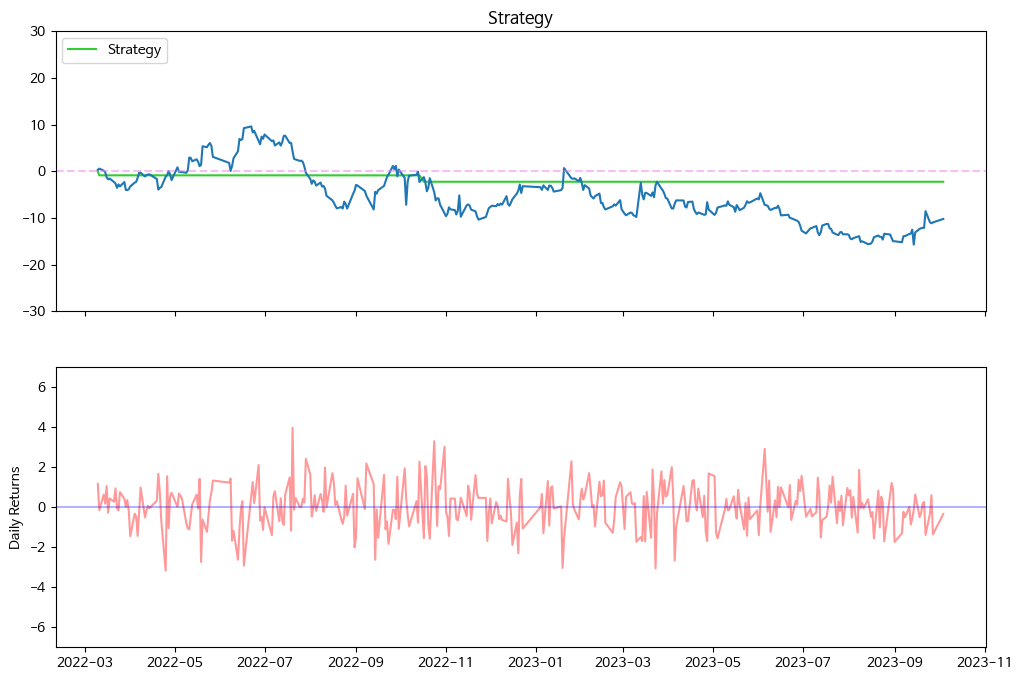

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.307401,1.168614
2022-03-11,9913.422914,-0.865771,0.568990,-0.141443
2022-03-14,9913.422914,-0.865771,0.141643,0.637394
2022-03-15,9913.422914,-0.865771,-0.188235,0.187661
2022-03-16,9913.422914,-0.865771,-1.302932,1.053617
...,...,...,...,...
2023-09-22,9775.517592,-2.244824,-8.538163,-1.383440
2023-09-25,9775.517592,-2.244824,-10.938484,-0.314070
2023-09-26,9775.517592,-2.244824,-11.143695,0.609116


In [192]:
# 200030_2018, logistic 백테스팅 결과
y_pred_lrc_200030_2018 = logistic_model(X_train, y_train, X_test, y_test, cv = 5)
lrc_return_200030_2018 = backtest(etf_indu, y_pred_lrc_200030_2018)
lrc_accuracy_200030_2018 = accuracy_score(y_pred_lrc_200030_2018, y_test)

total_result = result_append(total_result ,'200030_2018','Logistic', lrc_return_200030_2018, lrc_accuracy_200030_2018)

lrc_return_200030_2018


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50} 0.6017191977077364


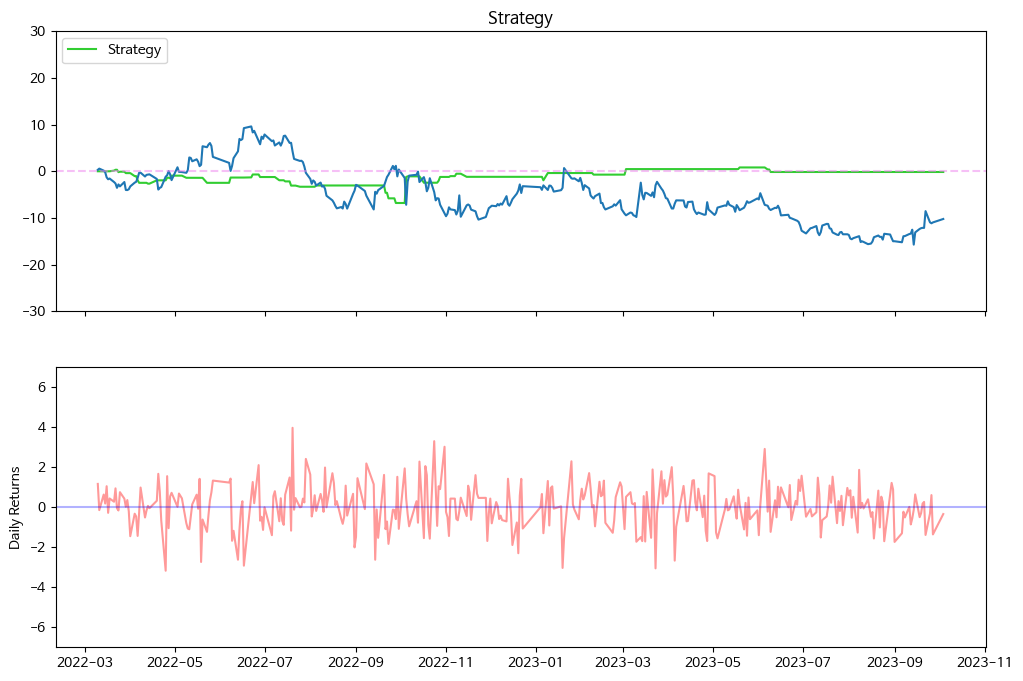

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.307401,1.168614
2022-03-11,10000.000000,0.000000,0.568990,-0.141443
2022-03-14,10000.000000,0.000000,0.141643,0.637394
2022-03-15,10000.000000,0.000000,-0.188235,0.187661
2022-03-16,10000.000000,0.000000,-1.302932,1.053617
...,...,...,...,...
2023-09-22,9984.763858,-0.152361,-8.538163,-1.383440
2023-09-25,9984.763858,-0.152361,-10.938484,-0.314070
2023-09-26,9984.763858,-0.152361,-11.143695,0.609116


In [193]:
# 200030_2018, RF 백테스팅 결과
y_pred_rf_200030_2018 = rf_model(X_train, y_train, X_test, y_test, cv=5)
rf_return_200030_2018 = backtest(etf_indu, y_pred_rf_200030_2018)
rf_accuracy_200030_2018 = accuracy_score(y_pred_rf_200030_2018, y_test)

total_result = result_append(total_result ,'200030_2018','RF', rf_return_200030_2018, rf_accuracy_200030_2018)

rf_return_200030_2018

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1} 0.6074498567335244


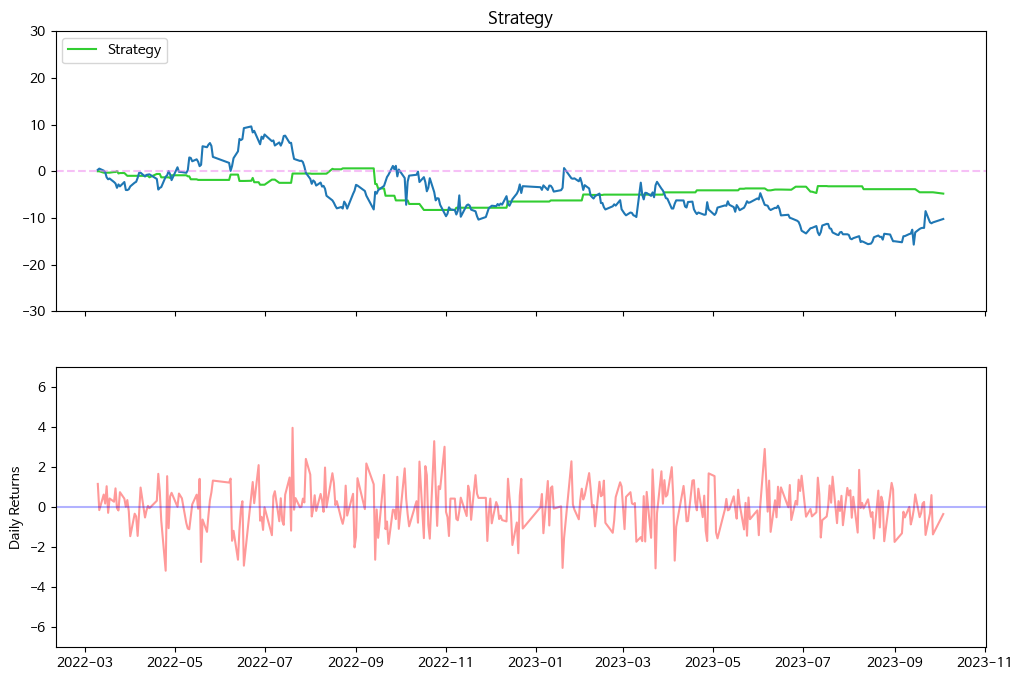

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.307401,1.168614
2022-03-11,10000.000000,0.000000,0.568990,-0.141443
2022-03-14,9970.000000,-0.300000,0.141643,0.637394
2022-03-15,9970.000000,-0.300000,-0.188235,0.187661
2022-03-16,9970.000000,-0.300000,-1.302932,1.053617
...,...,...,...,...
2023-09-22,9549.984115,-4.500159,-8.538163,-1.383440
2023-09-25,9549.984115,-4.500159,-10.938484,-0.314070
2023-09-26,9549.984115,-4.500159,-11.143695,0.609116


In [194]:
# 200030_2018, XGB 백테스팅 결과
y_pred_xgb_200030_2018 = xgb_model(X_train, y_train, X_test, y_test, cv=5)
xgb_return_200030_2018 = backtest(etf_indu, y_pred_xgb_200030_2018)
xgb_accuracy_200030_2018 = accuracy_score(y_pred_xgb_200030_2018, y_test)

total_result = result_append(total_result ,'200030_2018','XGB', xgb_return_200030_2018, xgb_accuracy_200030_2018)

xgb_return_200030_2018

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 293, number of negative: 521
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15677
[LightGBM] [Info] Number of data points in the train set: 814, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.359951 -> initscore=-0.575577
[LightGBM] [Info] Start training from score -0.575577
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

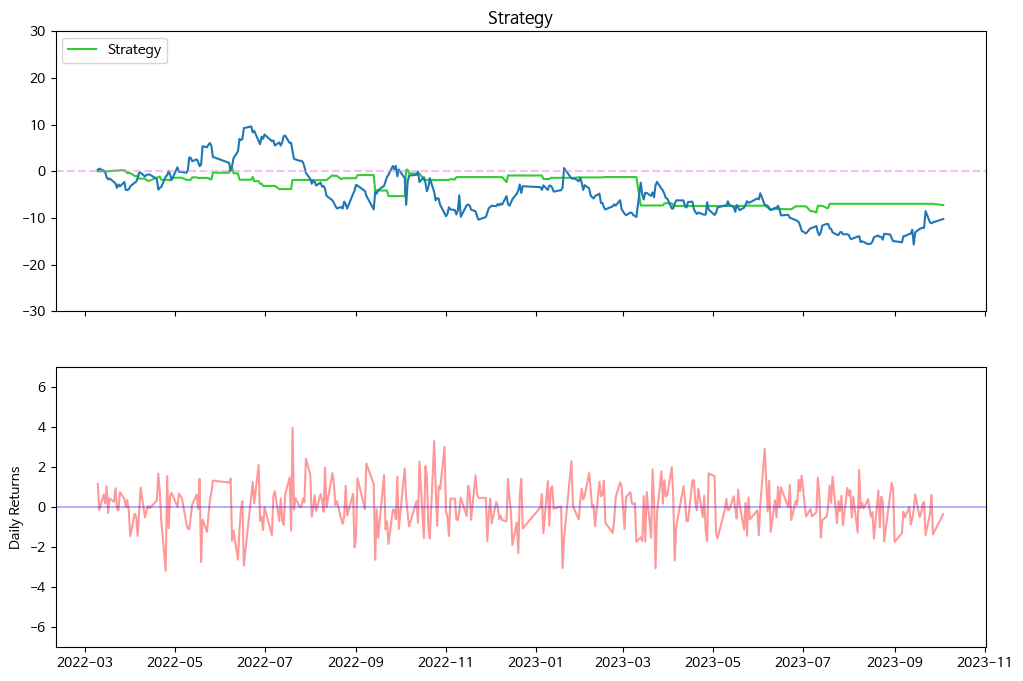

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.307401,1.168614
2022-03-11,10000.000000,0.000000,0.568990,-0.141443
2022-03-14,10000.000000,0.000000,0.141643,0.637394
2022-03-15,10000.000000,0.000000,-0.188235,0.187661
2022-03-16,10000.000000,0.000000,-1.302932,1.053617
...,...,...,...,...
2023-09-22,9302.519178,-6.974808,-8.538163,-1.383440
2023-09-25,9302.519178,-6.974808,-10.938484,-0.314070
2023-09-26,9302.519178,-6.974808,-11.143695,0.609116


In [195]:
# 200030_2018, LGB 백테스팅 결과
y_pred_lgb_200030_2018 = lgb_model(X_train, y_train, X_test, y_test, cv=5)
lgb_return_200030_2018 = backtest(etf_indu, y_pred_lgb_200030_2018)
lgb_accuracy_200030_2018 = accuracy_score(y_pred_lgb_200030_2018, y_test)

total_result = result_append(total_result ,'200030_2018','LGB', lgb_return_200030_2018, lgb_accuracy_200030_2018)

lgb_return_200030_2018

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.6217765042979942


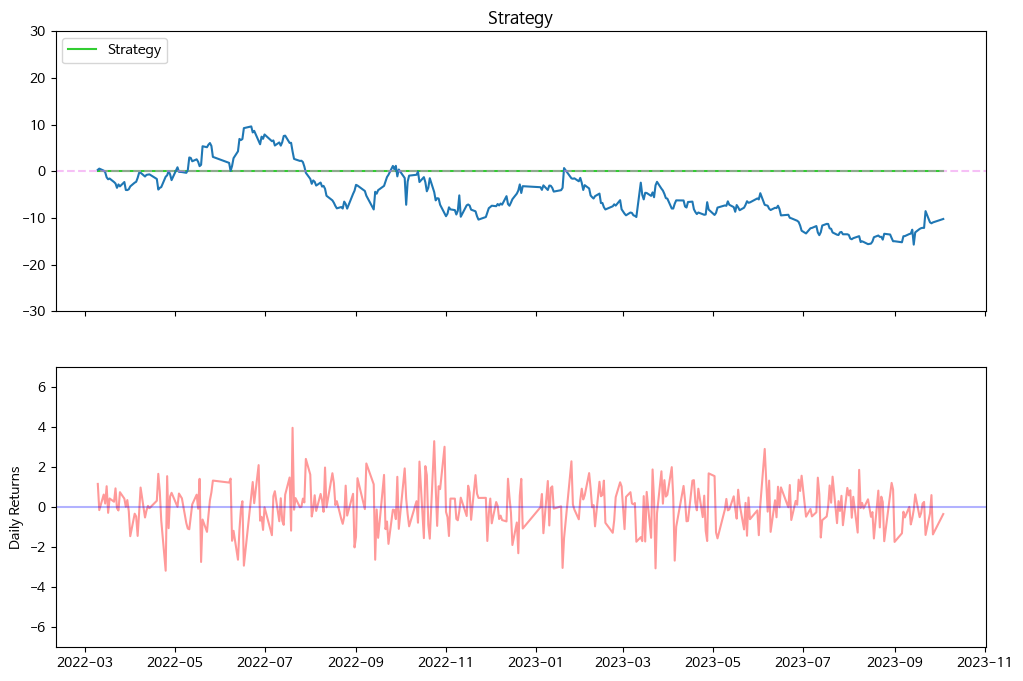

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000,0.0,0.307401,1.168614
2022-03-11,10000,0.0,0.568990,-0.141443
2022-03-14,10000,0.0,0.141643,0.637394
2022-03-15,10000,0.0,-0.188235,0.187661
2022-03-16,10000,0.0,-1.302932,1.053617
...,...,...,...,...
2023-09-22,10000,0.0,-8.538163,-1.383440
2023-09-25,10000,0.0,-10.938484,-0.314070
2023-09-26,10000,0.0,-11.143695,0.609116


In [196]:
# 200030_2018, SVM 백테스팅 결과
y_pred_svm_200030_2018 = svm_model(X_train, y_train, X_test, y_test, cv=5)
svm_return_200030_2018 = backtest(etf_indu, y_pred_svm_200030_2018)
svm_accuracy_200030_2018 = accuracy_score(y_pred_svm_200030_2018, y_test)

total_result = result_append(total_result ,'200030_2018','SVM', svm_return_200030_2018, svm_accuracy_200030_2018)

svm_return_200030_2018

In [197]:
# 200030_2014 모델링
scaled_df(df_200030_2014, 200030)
df_200030_2014 = df_200030_2014.dropna(axis=0, how="any")
# X와 y를 정의, 종목코드_Label
X = df_200030_2014.drop(columns='200030_Label')
y = df_200030_2014['200030_Label']
# 피쳐 셀렉
selected_features = feature_select(X, y, cv = 5)

# 선택된 피처로 X 정의
X = X[selected_features]

# 학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'} 0.6729323308270677


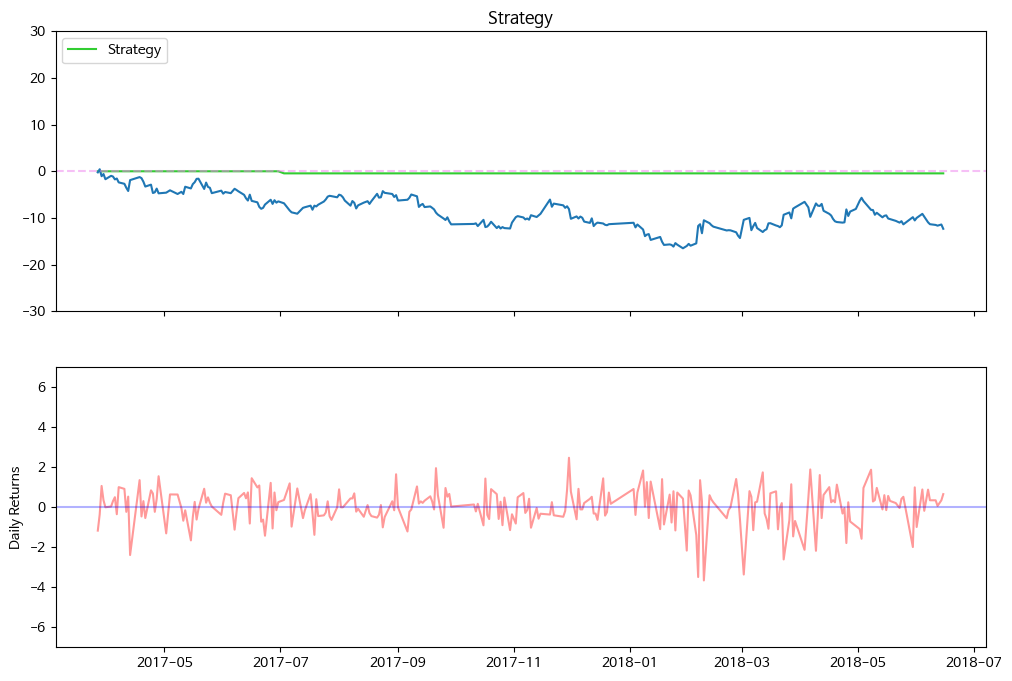

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-03-27,10000.00000,0.000000,-0.235664,-1.167315
2017-03-28,10000.00000,0.000000,0.434955,-0.354331
2017-03-29,10000.00000,0.000000,-1.051811,1.066772
2017-03-30,10000.00000,0.000000,-0.587084,0.351837
2017-03-31,10000.00000,0.000000,-1.702786,0.000000
...,...,...,...,...
2018-06-08,9955.35335,-0.446466,-11.343805,0.350263
2018-06-11,9955.35335,-0.446466,-11.498258,0.349040
2018-06-12,9955.35335,-0.446466,-11.652174,0.069565


In [198]:
#200030_2014, logistic 백테스팅 결과
y_pred_lrc_200030_2014 = logistic_model(X_train, y_train, X_test, y_test, cv=5)
lrc_return_200030_2014 = backtest(etf_indu, y_pred_lrc_200030_2014)
lrc_accuracy_200030_2014 = accuracy_score(y_pred_lrc_200030_2014, y_test)

total_result = result_append(total_result ,'200030_2014','Logistic', lrc_return_200030_2014, lrc_accuracy_200030_2014)

lrc_return_200030_2014

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100} 0.6729323308270677


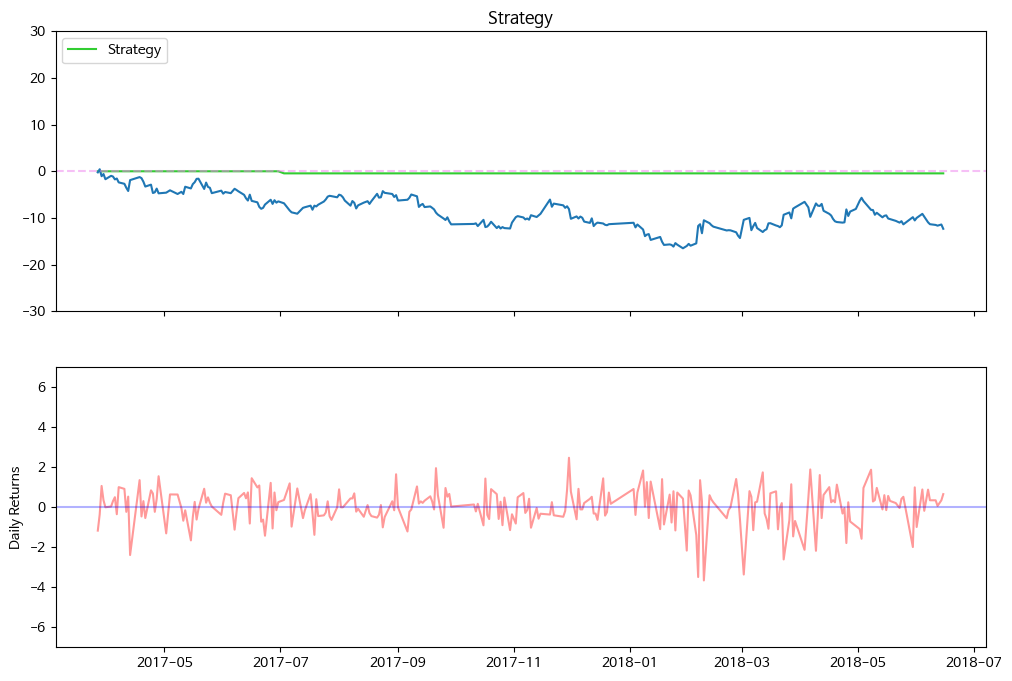

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-03-27,10000.00000,0.000000,-0.235664,-1.167315
2017-03-28,10000.00000,0.000000,0.434955,-0.354331
2017-03-29,10000.00000,0.000000,-1.051811,1.066772
2017-03-30,10000.00000,0.000000,-0.587084,0.351837
2017-03-31,10000.00000,0.000000,-1.702786,0.000000
...,...,...,...,...
2018-06-08,9955.35335,-0.446466,-11.343805,0.350263
2018-06-11,9955.35335,-0.446466,-11.498258,0.349040
2018-06-12,9955.35335,-0.446466,-11.652174,0.069565


In [199]:
#200030_2014, RF 백테스팅 결과
y_pred_rf_200030_2014 = rf_model(X_train, y_train, X_test, y_test, cv=5)
rf_return_200030_2014 = backtest(etf_indu, y_pred_rf_200030_2014)
rf_accuracy_200030_2014 = accuracy_score(y_pred_rf_200030_2014, y_test)

total_result = result_append(total_result ,'200030_2014','RF', rf_return_200030_2014, rf_accuracy_200030_2014)

rf_return_200030_2014

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8} 0.6766917293233082


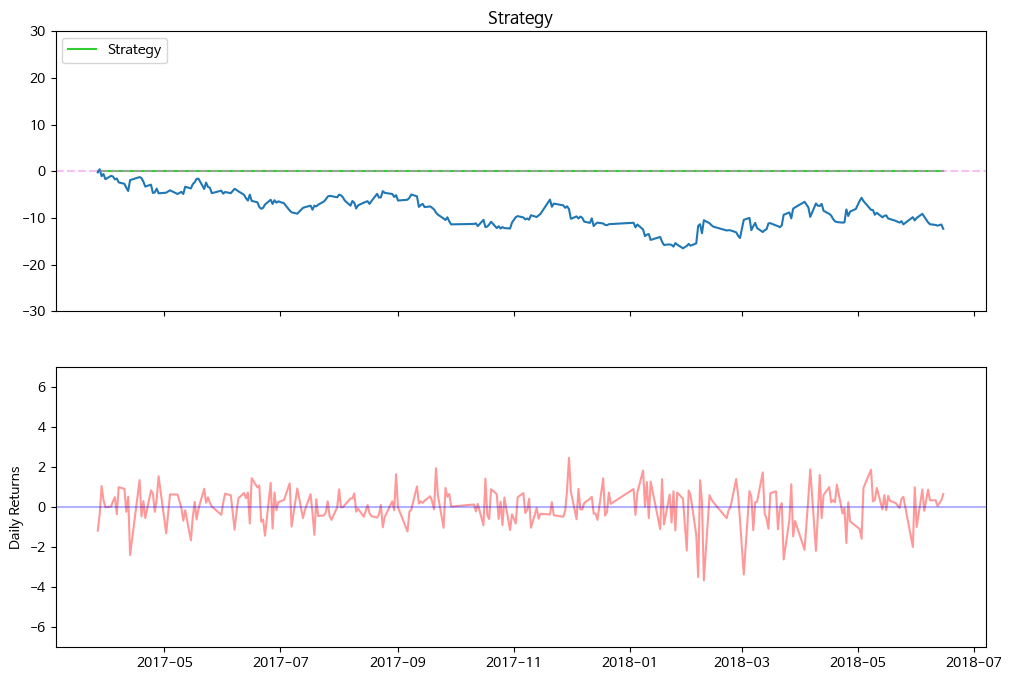

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-03-27,10000,0.0,-0.235664,-1.167315
2017-03-28,10000,0.0,0.434955,-0.354331
2017-03-29,10000,0.0,-1.051811,1.066772
2017-03-30,10000,0.0,-0.587084,0.351837
2017-03-31,10000,0.0,-1.702786,0.000000
...,...,...,...,...
2018-06-08,10000,0.0,-11.343805,0.350263
2018-06-11,10000,0.0,-11.498258,0.349040
2018-06-12,10000,0.0,-11.652174,0.069565


In [200]:
#200030_2014, XGB 백테스팅 결과
y_pred_xgb_200030_2014 = xgb_model(X_train, y_train, X_test, y_test, cv=5)
xgb_return_200030_2014 = backtest(etf_indu, y_pred_xgb_200030_2014)
xgb_accuracy_200030_2014 = accuracy_score(y_pred_xgb_200030_2014, y_test)

total_result = result_append(total_result ,'200030_2014','XGB', xgb_return_200030_2014, xgb_accuracy_200030_2014)

xgb_return_200030_2014

[LightGBM] [Info] Number of positive: 204, number of negative: 415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11531
[LightGBM] [Info] Number of data points in the train set: 619, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.329564 -> initscore=-0.710159
[LightGBM] [Info] Start training from score -0.710159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 204, number of negative: 415
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea

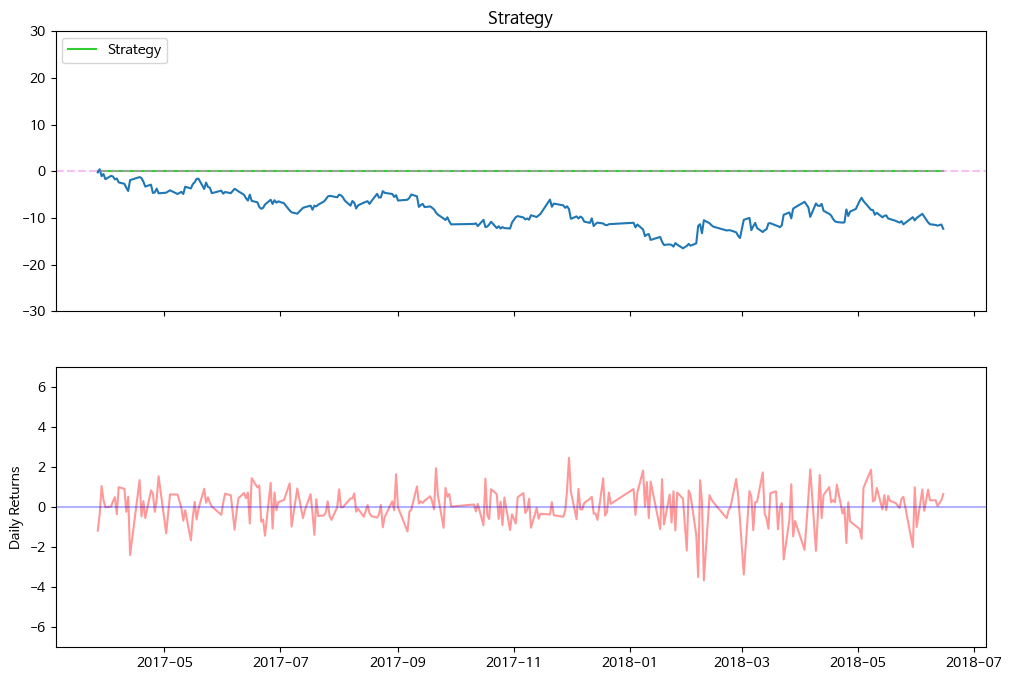

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-03-27,10000,0.0,-0.235664,-1.167315
2017-03-28,10000,0.0,0.434955,-0.354331
2017-03-29,10000,0.0,-1.051811,1.066772
2017-03-30,10000,0.0,-0.587084,0.351837
2017-03-31,10000,0.0,-1.702786,0.000000
...,...,...,...,...
2018-06-08,10000,0.0,-11.343805,0.350263
2018-06-11,10000,0.0,-11.498258,0.349040
2018-06-12,10000,0.0,-11.652174,0.069565


In [201]:
#200030_2014, LGB 백테스팅 결과
y_pred_lgb_200030_2014 = lgb_model(X_train, y_train, X_test, y_test, cv=5)
lgb_return_200030_2014 = backtest(etf_indu, y_pred_lgb_200030_2014)
lgb_accuracy_200030_2014 = accuracy_score(y_pred_lgb_200030_2014, y_test)

total_result = result_append(total_result ,'200030_2014','LGB', lgb_return_200030_2014, lgb_accuracy_200030_2014)

lgb_return_200030_2014

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'} 0.6766917293233082


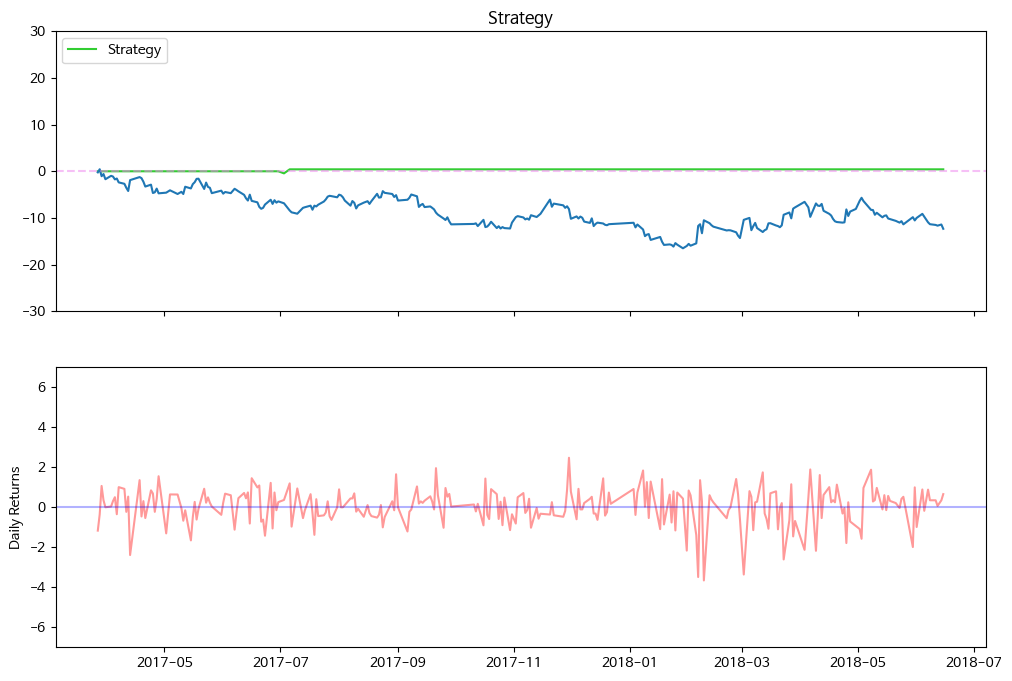

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-03-27,10000.000000,0.000000,-0.235664,-1.167315
2017-03-28,10000.000000,0.000000,0.434955,-0.354331
2017-03-29,10000.000000,0.000000,-1.051811,1.066772
2017-03-30,10000.000000,0.000000,-0.587084,0.351837
2017-03-31,10000.000000,0.000000,-1.702786,0.000000
...,...,...,...,...
2018-06-08,10041.711773,0.417118,-11.343805,0.350263
2018-06-11,10041.711773,0.417118,-11.498258,0.349040
2018-06-12,10041.711773,0.417118,-11.652174,0.069565


In [202]:
#200030_2014, SVM 백테스팅 결과
y_pred_svm_200030_2014 = svm_model(X_train, y_train, X_test, y_test, cv=5)
svm_return_200030_2014 = backtest(etf_indu, y_pred_svm_200030_2014)
svm_accuracy_200030_2014 = accuracy_score(y_pred_svm_200030_2014, y_test)

total_result = result_append(total_result ,'200030_2014','SVM', svm_return_200030_2014, svm_accuracy_200030_2014)

svm_return_200030_2014

In [203]:
#218420_2018 모델링
df_218420_2018 = df_218420_2018.dropna(axis=0, how="any")
scaled_df(df_218420_2018, 218420)

#X와 y를 정의, 종목코드_Label
X = df_218420_2018.drop(columns='218420_Label')
y = df_218420_2018['218420_Label']
#피처셀렉
selected_features = feature_select(X, y, cv = 5)

#선택된 피처로 X 정의
X = X[selected_features]

#학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'} 0.5673352435530086


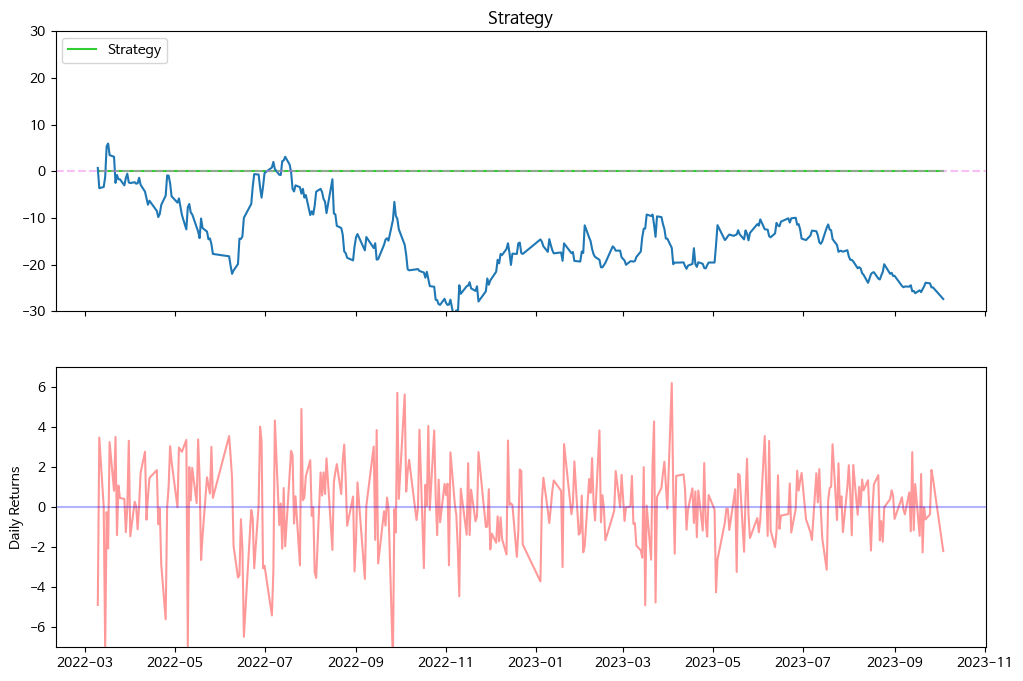

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000,0.0,0.711575,-4.883513
2022-03-11,10000,0.0,-3.631412,3.485634
2022-03-14,10000,0.0,-3.368229,0.045517
2022-03-15,10000,0.0,-1.209865,-7.097361
2022-03-16,10000,0.0,5.359801,-0.244858
...,...,...,...,...
2023-09-22,10000,0.0,-23.879527,-0.604767
2023-09-25,10000,0.0,-24.015748,-0.357910
2023-09-26,10000,0.0,-24.876150,1.867816


In [204]:
#218420_2018, logistic 백테스팅 결과
y_pred_lrc_218420_2018 = logistic_model(X_train, y_train, X_test, y_test, cv=5)
lrc_return_218420_2018 = backtest(etf_energy, y_pred_lrc_218420_2018)
lrc_accuracy_218420_2018 = accuracy_score(y_pred_lrc_218420_2018, y_test)

total_result = result_append(total_result ,'218420_2018','Logistic', lrc_return_218420_2018, lrc_accuracy_218420_2018)

lrc_return_218420_2018

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50} 0.5931232091690545


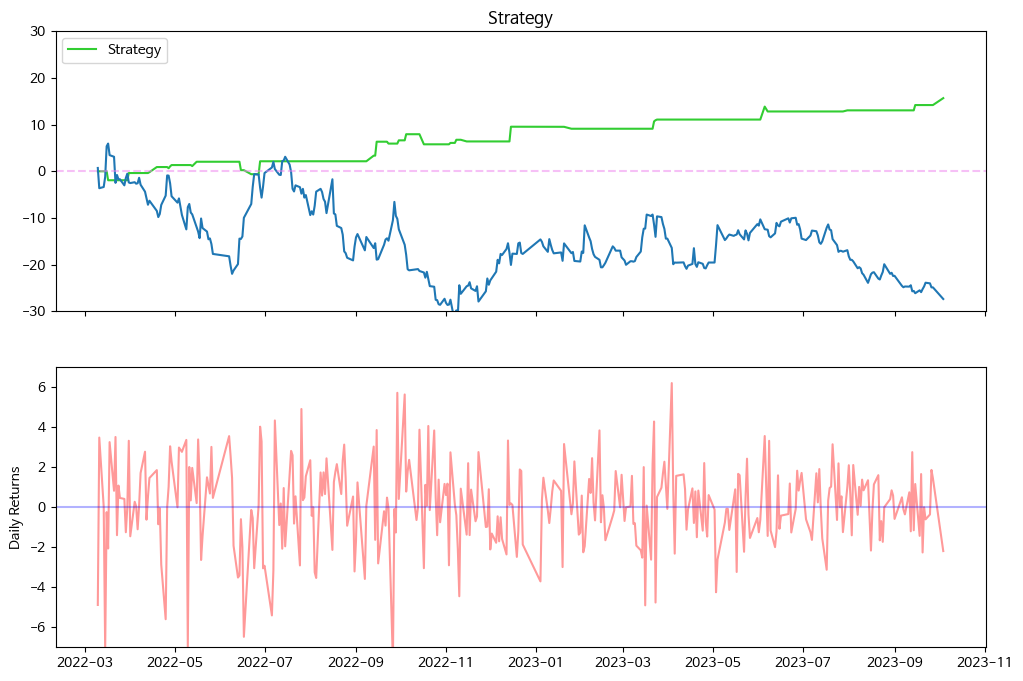

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.711575,-4.883513
2022-03-11,10000.000000,0.000000,-3.631412,3.485634
2022-03-14,10000.000000,0.000000,-3.368229,0.045517
2022-03-15,10000.000000,0.000000,-1.209865,-7.097361
2022-03-16,10000.000000,0.000000,5.359801,-0.244858
...,...,...,...,...
2023-09-22,11419.004858,14.190049,-23.879527,-0.604767
2023-09-25,11419.004858,14.190049,-24.015748,-0.357910
2023-09-26,11419.004858,14.190049,-24.876150,1.867816


In [205]:
#218420_2018, RF 백테스팅 결과
y_pred_rf_218420_2018 = rf_model(X_train, y_train, X_test, y_test, cv=5)
rf_return_218420_2018 = backtest(etf_energy, y_pred_rf_218420_2018)
rf_accuracy_218420_2018 = accuracy_score(y_pred_rf_218420_2018, y_test)

total_result = result_append(total_result ,'218420_2018','RF', rf_return_218420_2018, rf_accuracy_218420_2018)

rf_return_218420_2018

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50, 'subsample': 0.8} 0.5673352435530086


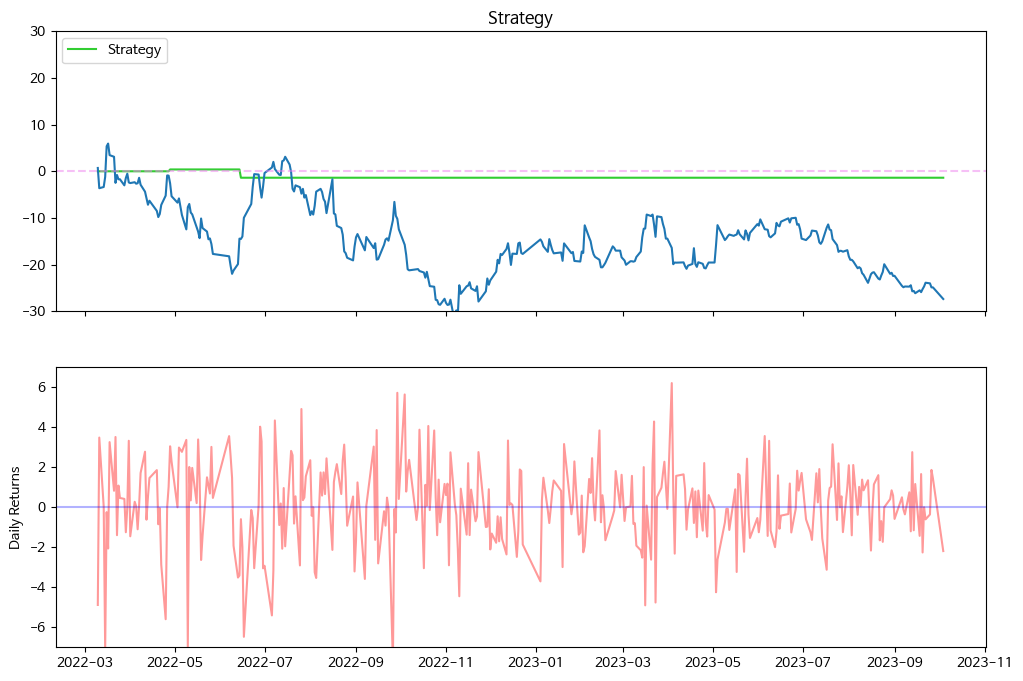

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.711575,-4.883513
2022-03-11,10000.000000,0.000000,-3.631412,3.485634
2022-03-14,10000.000000,0.000000,-3.368229,0.045517
2022-03-15,10000.000000,0.000000,-1.209865,-7.097361
2022-03-16,10000.000000,0.000000,5.359801,-0.244858
...,...,...,...,...
2023-09-22,9861.795476,-1.382045,-23.879527,-0.604767
2023-09-25,9861.795476,-1.382045,-24.015748,-0.357910
2023-09-26,9861.795476,-1.382045,-24.876150,1.867816


In [206]:
#218420_2018, XGB 백테스팅 결과
y_pred_xgb_218420_2018 = xgb_model(X_train, y_train, X_test, y_test, cv=5)
xgb_return_218420_2018 = backtest(etf_energy, y_pred_xgb_218420_2018)
xgb_accuracy_218420_2018 = accuracy_score(y_pred_xgb_218420_2018, y_test)

total_result = result_append(total_result ,'218420_2018','XGB', xgb_return_218420_2018, xgb_accuracy_218420_2018)

xgb_return_218420_2018

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 333, number of negative: 481
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11121
[LightGBM] [Info] Number of data points in the train set: 814, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.409091 -> initscore=-0.367725
[LightGBM] [Info] Start training from score -0.367725
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

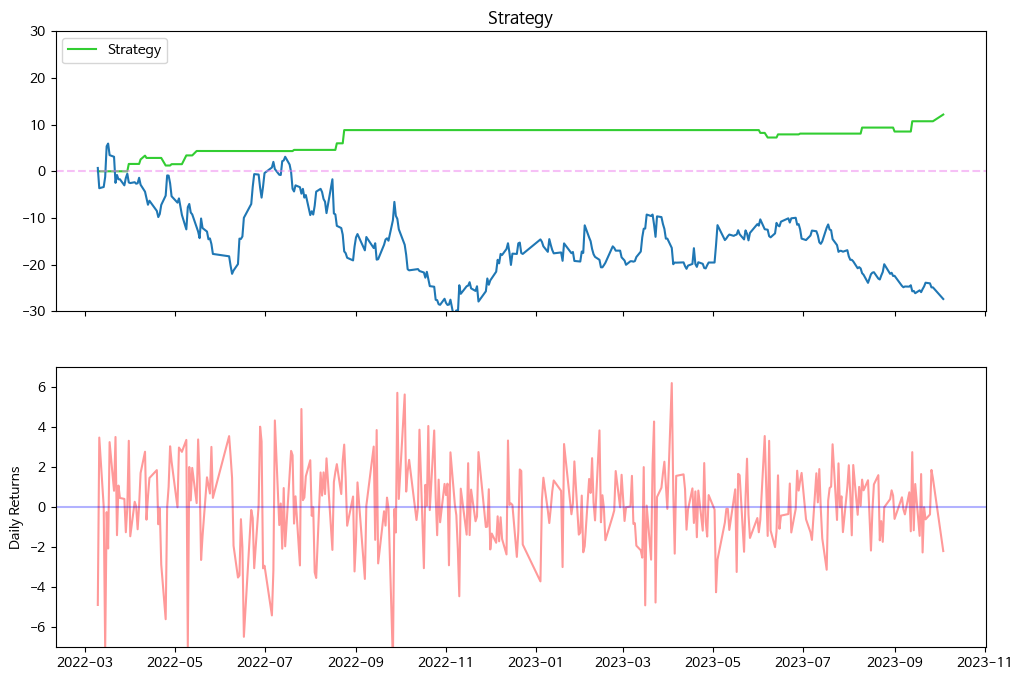

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.711575,-4.883513
2022-03-11,10000.000000,0.000000,-3.631412,3.485634
2022-03-14,10000.000000,0.000000,-3.368229,0.045517
2022-03-15,10000.000000,0.000000,-1.209865,-7.097361
2022-03-16,10000.000000,0.000000,5.359801,-0.244858
...,...,...,...,...
2023-09-22,11071.796895,10.717969,-23.879527,-0.604767
2023-09-25,11071.796895,10.717969,-24.015748,-0.357910
2023-09-26,11071.796895,10.717969,-24.876150,1.867816


In [207]:
#218420_2018, LGB 백테스팅 결과
y_pred_lgb_218420_2018 = lgb_model(X_train, y_train, X_test, y_test, cv=5)
lgb_return_218420_2018 = backtest(etf_energy, y_pred_lgb_218420_2018)
lgb_accuracy_218420_2018 = accuracy_score(y_pred_lgb_218420_2018, y_test)

total_result = result_append(total_result ,'218420_2018','LGB', lgb_return_218420_2018, lgb_accuracy_218420_2018)

lgb_return_218420_2018

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'} 0.5730659025787965


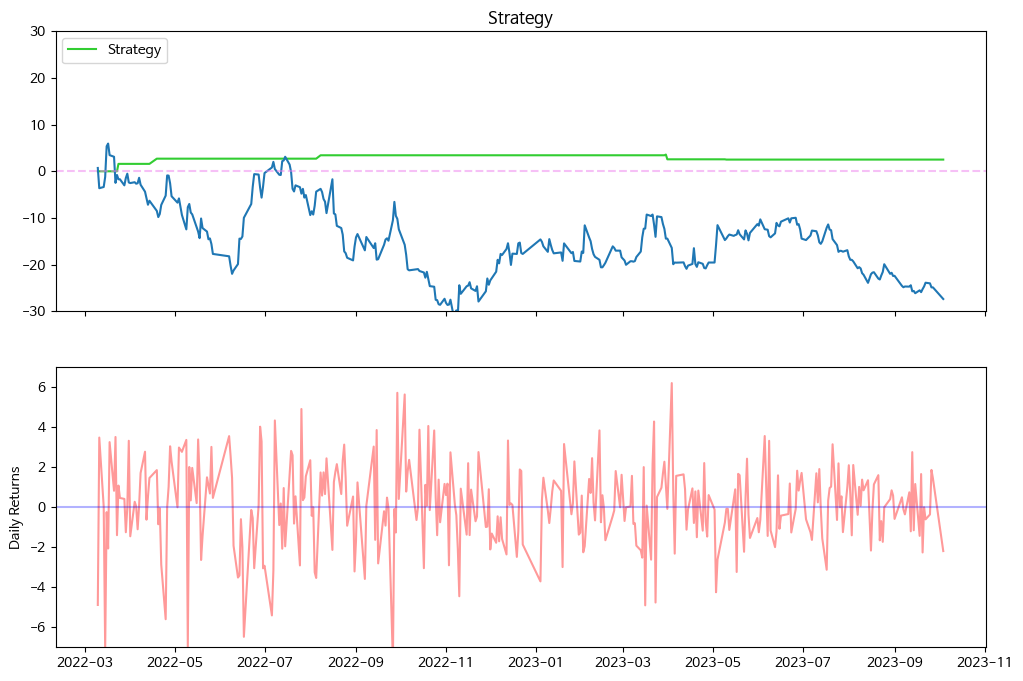

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2022-03-10,10000.000000,0.000000,0.711575,-4.883513
2022-03-11,10000.000000,0.000000,-3.631412,3.485634
2022-03-14,10000.000000,0.000000,-3.368229,0.045517
2022-03-15,10000.000000,0.000000,-1.209865,-7.097361
2022-03-16,10000.000000,0.000000,5.359801,-0.244858
...,...,...,...,...
2023-09-22,10250.500309,2.505003,-23.879527,-0.604767
2023-09-25,10250.500309,2.505003,-24.015748,-0.357910
2023-09-26,10250.500309,2.505003,-24.876150,1.867816


In [208]:
#218420_2018, SVM 백테스팅 결과
y_pred_svm_218420_2018 = svm_model(X_train, y_train, X_test, y_test, cv=5)
svm_return_218420_2018 = backtest(etf_energy, y_pred_svm_218420_2018)
svm_accuracy_218420_2018 = accuracy_score(y_pred_svm_218420_2018, y_test)

total_result = result_append(total_result ,'218420_2018','SVM', svm_return_218420_2018, svm_accuracy_218420_2018)

svm_return_218420_2018

In [209]:
# 218420_2015 모델링
scaled_df(df_218420_2015, 218420)
df_218420_2015 = df_218420_2015.dropna(axis=0, how="any")
# X와 y를 정의, 종목코드_Label
X = df_218420_2015.drop(columns='218420_Label')
y = df_218420_2015['218420_Label']
#
selected_features = feature_select(X, y, cv = 5)

# 선택된 피처로 X 정의
X = X[selected_features]

# 학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'} 0.6135265700483091


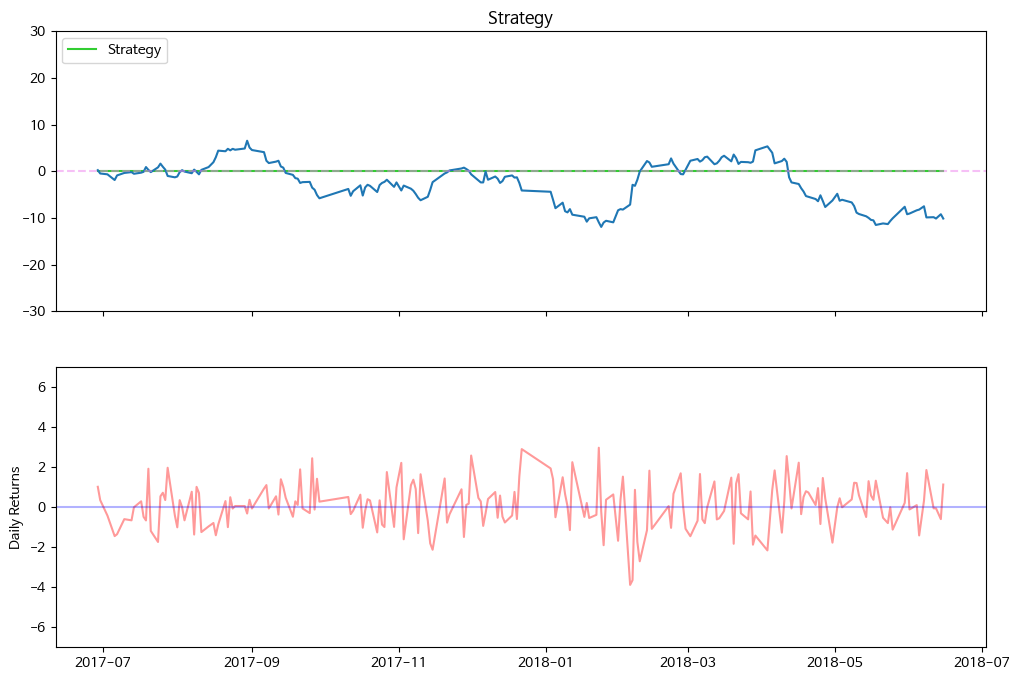

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-06-29,10000,0.0,0.239091,1.024096
2017-06-30,10000,0.0,-0.474777,0.357782
2017-07-03,10000,0.0,-0.651659,-0.415924
2017-07-06,10000,0.0,-1.872440,-1.441753
2017-07-07,10000,0.0,-0.886525,-1.345816
...,...,...,...,...
2018-06-08,10000,0.0,-9.887157,1.861993
2018-06-11,10000,0.0,-9.838710,-0.053763
2018-06-12,10000,0.0,-10.128617,-0.053792


In [210]:
#218420_2015, logistic 백테스팅 결과
y_pred_lrc_218420_2015 = logistic_model(X_train, y_train, X_test, y_test, cv=5)
lrc_return_218420_2015 = backtest(etf_energy, y_pred_lrc_218420_2015)
lrc_accuracy_218420_2015 = accuracy_score(y_pred_lrc_218420_2015, y_test)

total_result = result_append(total_result ,'218420_2015','Logistic', lrc_return_218420_2015, lrc_accuracy_218420_2015)

lrc_return_218420_2015

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100} 0.6183574879227053


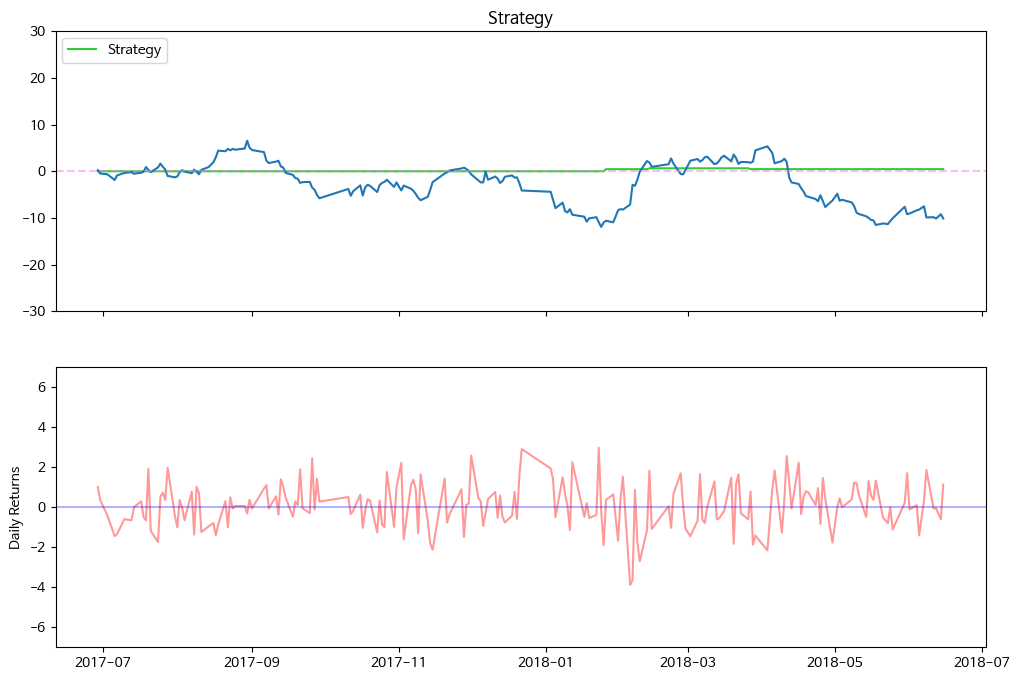

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-06-29,10000.000000,0.000000,0.239091,1.024096
2017-06-30,10000.000000,0.000000,-0.474777,0.357782
2017-07-03,10000.000000,0.000000,-0.651659,-0.415924
2017-07-06,10000.000000,0.000000,-1.872440,-1.441753
2017-07-07,10000.000000,0.000000,-0.886525,-1.345816
...,...,...,...,...
2018-06-08,10046.156817,0.461568,-9.887157,1.861993
2018-06-11,10046.156817,0.461568,-9.838710,-0.053763
2018-06-12,10046.156817,0.461568,-10.128617,-0.053792


In [211]:
#218420_2015, RF 백테스팅 결과
y_pred_rf_218420_2015 = rf_model(X_train, y_train, X_test, y_test, cv=5)
rf_return_218420_2015 = backtest(etf_energy, y_pred_rf_218420_2015)
rf_accuracy_218420_2015 = accuracy_score(y_pred_rf_218420_2015, y_test)

total_result = result_append(total_result ,'218420_2015','RF', rf_return_218420_2015, rf_accuracy_218420_2015)

rf_return_218420_2015

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8} 0.6135265700483091


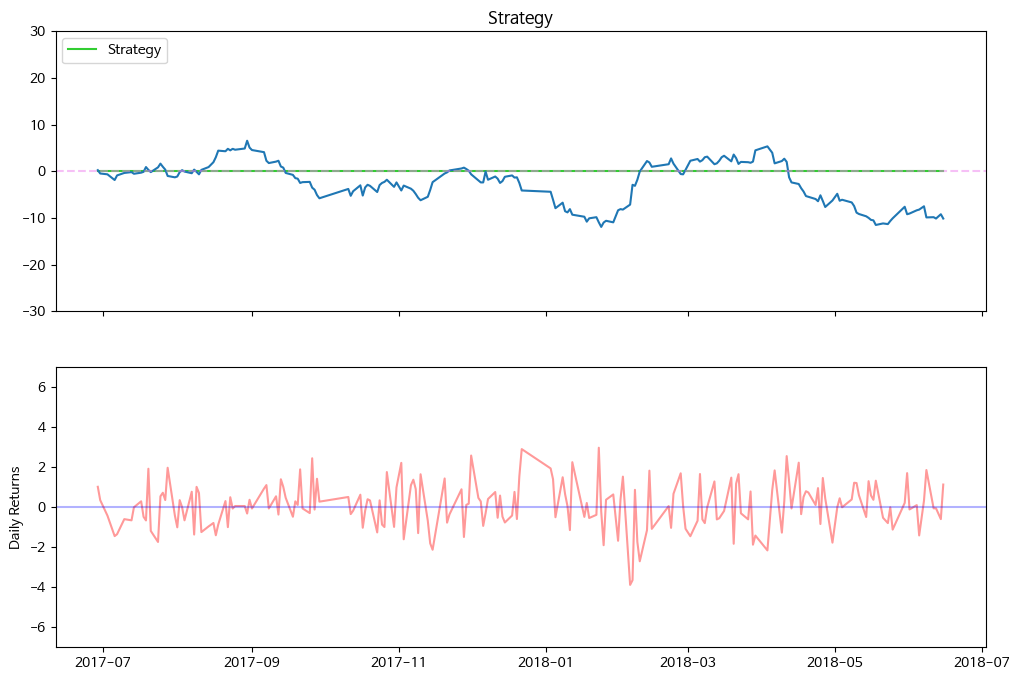

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-06-29,10000,0.0,0.239091,1.024096
2017-06-30,10000,0.0,-0.474777,0.357782
2017-07-03,10000,0.0,-0.651659,-0.415924
2017-07-06,10000,0.0,-1.872440,-1.441753
2017-07-07,10000,0.0,-0.886525,-1.345816
...,...,...,...,...
2018-06-08,10000,0.0,-9.887157,1.861993
2018-06-11,10000,0.0,-9.838710,-0.053763
2018-06-12,10000,0.0,-10.128617,-0.053792


In [212]:
#218420_2015, XGB 백테스팅 결과
y_pred_xgb_218420_2015 = xgb_model(X_train, y_train, X_test, y_test, cv=5)
xgb_return_218420_2015 = backtest(etf_energy, y_pred_xgb_218420_2015)
xgb_accuracy_218420_2015 = accuracy_score(y_pred_xgb_218420_2015, y_test)

total_result = result_append(total_result ,'218420_2015','XGB', xgb_return_218420_2015, xgb_accuracy_218420_2015)

xgb_return_218420_2015

[LightGBM] [Info] Number of positive: 173, number of negative: 310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10229
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358178 -> initscore=-0.583281
[LightGBM] [Info] Start training from score -0.583281
[LightGBM] [Info] Number of positive: 173, number of negative: 310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10229
[LightGBM] [Info] Number of data points in the train set: 483, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.358178 -> initscore=-0.583281
[LightGBM] [

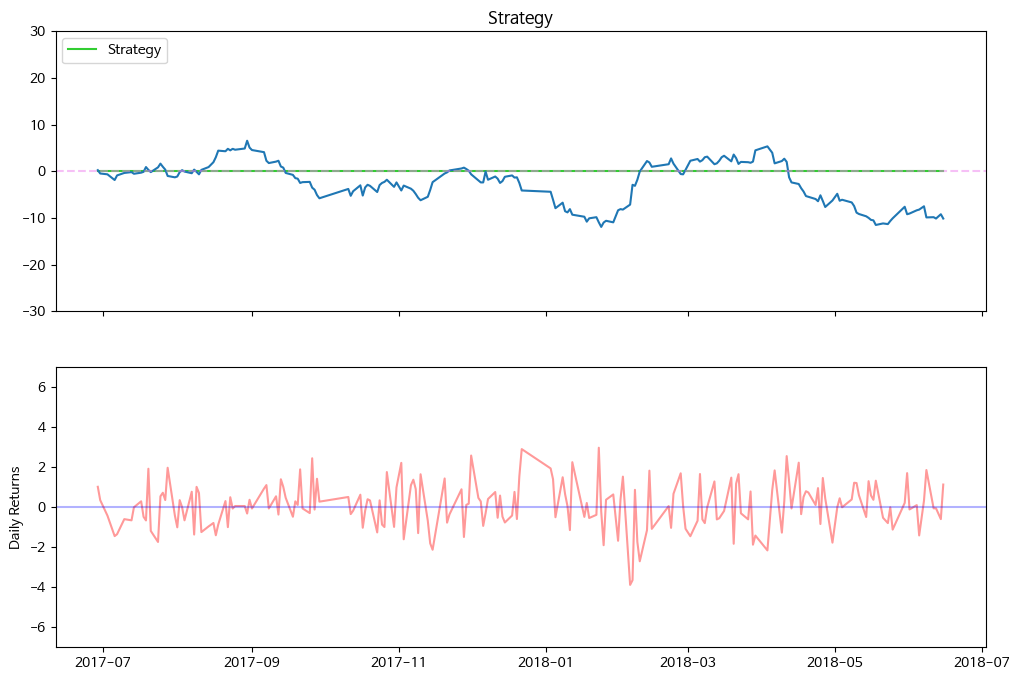

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-06-29,10000,0.0,0.239091,1.024096
2017-06-30,10000,0.0,-0.474777,0.357782
2017-07-03,10000,0.0,-0.651659,-0.415924
2017-07-06,10000,0.0,-1.872440,-1.441753
2017-07-07,10000,0.0,-0.886525,-1.345816
...,...,...,...,...
2018-06-08,10000,0.0,-9.887157,1.861993
2018-06-11,10000,0.0,-9.838710,-0.053763
2018-06-12,10000,0.0,-10.128617,-0.053792


In [213]:
#218420_2015, LGB 백테스팅 결과
y_pred_lgb_218420_2015 = lgb_model(X_train, y_train, X_test, y_test, cv=5)
lgb_return_218420_2015 = backtest(etf_energy, y_pred_lgb_218420_2015)
lgb_accuracy_218420_2015 = accuracy_score(y_pred_lgb_218420_2015, y_test)

total_result = result_append(total_result ,'218420_2015','LGB', lgb_return_218420_2015, lgb_accuracy_218420_2015)

lgb_return_218420_2015

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.6135265700483091


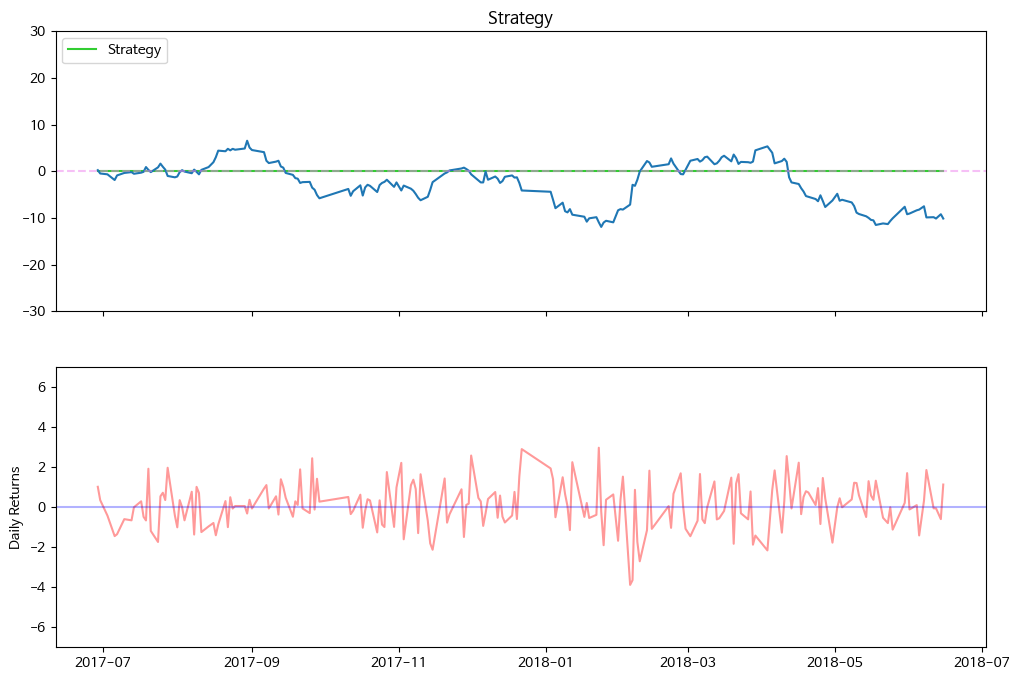

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2017-06-29,10000,0.0,0.239091,1.024096
2017-06-30,10000,0.0,-0.474777,0.357782
2017-07-03,10000,0.0,-0.651659,-0.415924
2017-07-06,10000,0.0,-1.872440,-1.441753
2017-07-07,10000,0.0,-0.886525,-1.345816
...,...,...,...,...
2018-06-08,10000,0.0,-9.887157,1.861993
2018-06-11,10000,0.0,-9.838710,-0.053763
2018-06-12,10000,0.0,-10.128617,-0.053792


In [214]:
#218420_2015, SVM 백테스팅 결과
y_pred_svm_218420_2015 = svm_model(X_train, y_train, X_test, y_test, cv=5)
svm_return_218420_2015 = backtest(etf_energy, y_pred_svm_218420_2015)
svm_accuracy_218420_2015 = accuracy_score(y_pred_svm_218420_2015, y_test)

total_result = result_append(total_result ,'218420_2015','SVM', svm_return_218420_2015, svm_accuracy_218420_2015)

svm_return_218420_2015

In [215]:
total_result

,Model,Return Rate %,Holding Return Rate %,accuracy
200030_2018,Logistic,-2.244824,-10.222222,0.613181
200030_2018,RF,-0.152361,-10.222222,0.601719
200030_2018,XGB,-4.786658,-10.222222,0.607450
200030_2018,LGB,-7.253884,-10.222222,0.598854
200030_2018,SVM,0.000000,-10.222222,0.621777
200030_2014,Logistic,-0.446466,-12.323093,0.672932
200030_2014,RF,-0.446466,-12.323093,0.672932
200030_2014,XGB,0.000000,-12.323093,0.676692
200030_2014,LGB,0.000000,-12.323093,0.676692
200030_2014,SVM,0.417118,-12.323093,0.676692


In [216]:
#453630 모델링
scaled_df(df_453630_2023, 453630)
df_453630_2023 = df_453630_2023.dropna(axis=0, how="any")
#X와 y를 정의, 종목코드_Label
X = df_453630_2023.drop(columns='453630_Label')
y = df_453630_2023['453630_Label']
#피처셀렉
selected_features = feature_select(X, y, cv = 3)

#선택된 피처로 X 정의
X = X[selected_features]

#학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

{'C': 0.005, 'penalty': 'l2', 'solver': 'liblinear'} 0.5405405405405406


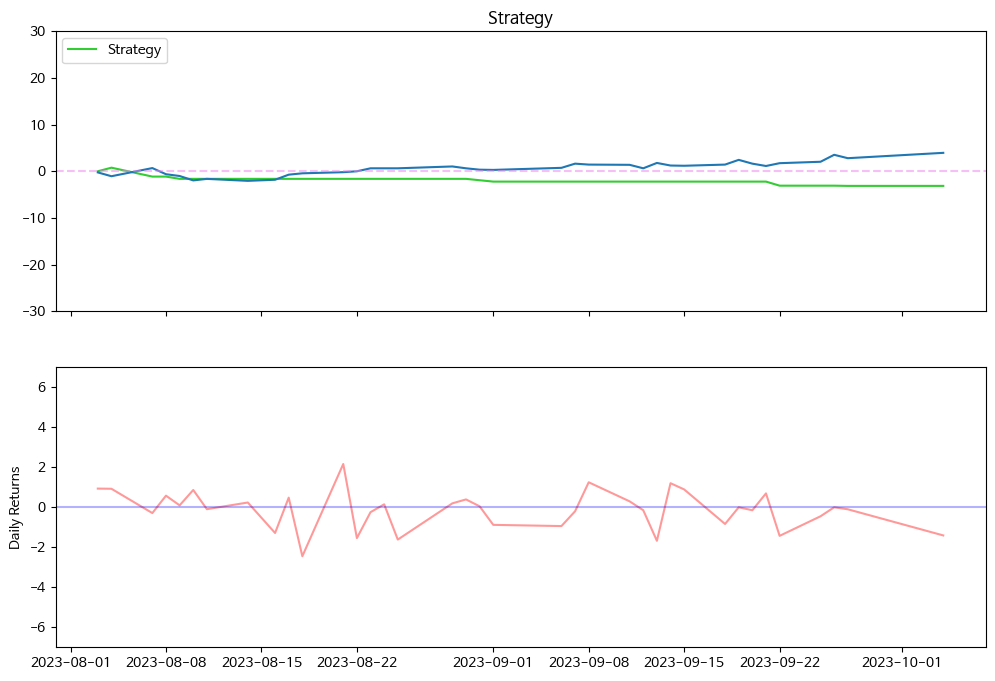

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.242954,0.934120
2023-08-04,10077.160253,0.771603,-1.060241,0.925475
2023-08-07,9886.433460,-1.135665,0.686611,-0.289575
2023-08-08,9886.433460,-1.135665,-0.629235,0.580833
2023-08-09,9837.743488,-1.622565,-1.012536,0.096246
2023-08-10,9837.743488,-1.622565,-1.957975,0.865385
2023-08-11,9837.743488,-1.622565,-1.629133,-0.095329
2023-08-14,9837.743488,-1.622565,-2.051527,0.238550
2023-08-16,9837.743488,-1.622565,-1.817312,-1.285102


In [217]:
#453630_2023, logistic 백테스팅 결과
y_pred_lrc_453630_2023 = logistic_model(X_train, y_train, X_test, y_test, cv = 3)
lrc_return_453630_2023 = backtest(etf_staple, y_pred_lrc_453630_2023)
lrc_accuracy_453630_2023 = accuracy_score(y_pred_lrc_453630_2023, y_test)

total_result = result_append(total_result ,'453630_2023','Logistic', lrc_return_453630_2023, lrc_accuracy_453630_2023)

lrc_return_453630_2023

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100} 0.4864864864864865


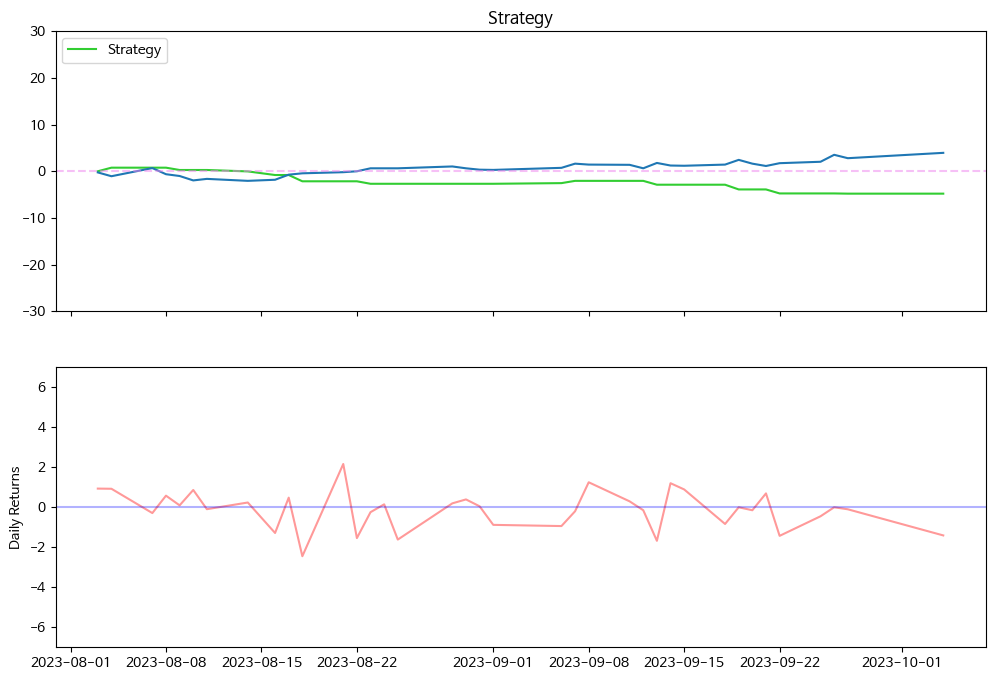

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.242954,0.934120
2023-08-04,10077.160253,0.771603,-1.060241,0.925475
2023-08-07,10077.160253,0.771603,0.686611,-0.289575
2023-08-08,10077.160253,0.771603,-0.629235,0.580833
2023-08-09,10027.530966,0.275310,-1.012536,0.096246
2023-08-10,10027.530966,0.275310,-1.957975,0.865385
2023-08-11,10027.530966,0.275310,-1.629133,-0.095329
2023-08-14,9997.448374,-0.025516,-2.051527,0.238550
2023-08-16,9919.871791,-0.801282,-1.817312,-1.285102


In [218]:
#453630_2023, RF 백테스팅 결과
y_pred_rf_453630_2023 = rf_model(X_train, y_train, X_test, y_test, cv = 3)
rf_return_453630_2023 = backtest(etf_staple, y_pred_rf_453630_2023)
rf_accuracy_453630_2023 = accuracy_score(y_pred_rf_453630_2023, y_test)

total_result = result_append(total_result ,'453630_2023','RF', rf_return_453630_2023, rf_accuracy_453630_2023)

rf_return_453630_2023

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8} 0.5135135135135135


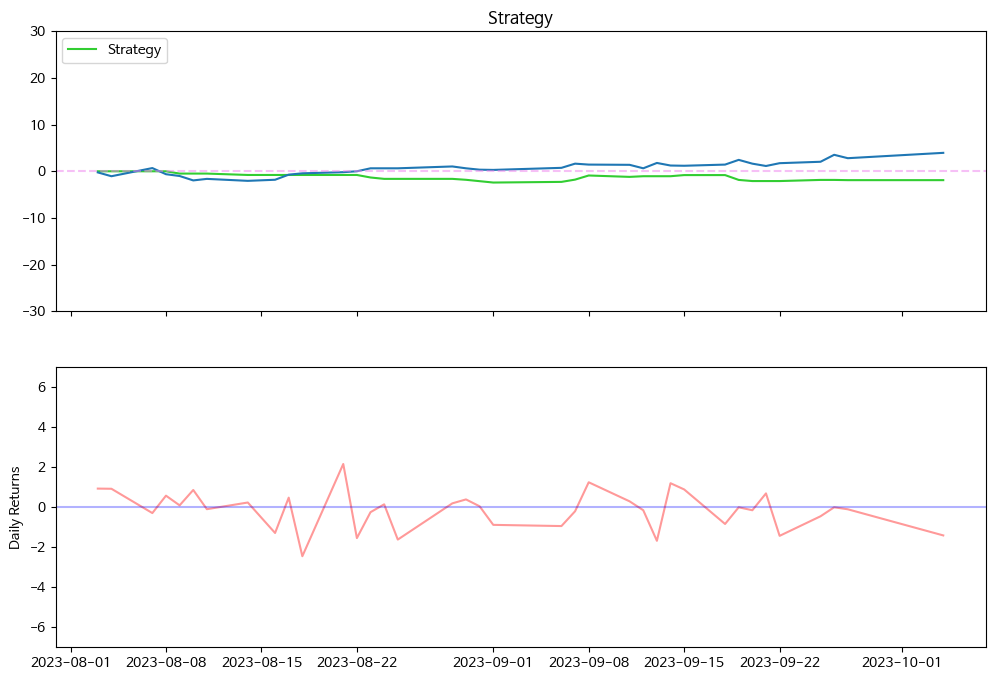

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.242954,0.934120
2023-08-04,10000.000000,0.000000,-1.060241,0.925475
2023-08-07,10000.000000,0.000000,0.686611,-0.289575
2023-08-08,10000.000000,0.000000,-0.629235,0.580833
2023-08-09,9950.750722,-0.492493,-1.012536,0.096246
2023-08-10,9950.750722,-0.492493,-1.957975,0.865385
2023-08-11,9950.750722,-0.492493,-1.629133,-0.095329
2023-08-14,9920.898470,-0.791015,-2.051527,0.238550
2023-08-16,9920.898470,-0.791015,-1.817312,-1.285102


In [219]:
#453630_2023, XGB 백테스팅 결과
y_pred_xgb_453630_2023 = xgb_model(X_train, y_train, X_test, y_test, cv = 3)
xgb_return_453630_2023 = backtest(etf_staple, y_pred_xgb_453630_2023)
xgb_accuracy_453630_2023 = accuracy_score(y_pred_xgb_453630_2023, y_test)

total_result = result_append(total_result ,'453630_2023','XGB', xgb_return_453630_2023, xgb_accuracy_453630_2023)

xgb_return_453630_2023

[LightGBM] [Info] Number of positive: 37, number of negative: 47
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440476 -> initscore=-0.239230
[LightGBM] [Info] Start training from score -0.239230
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

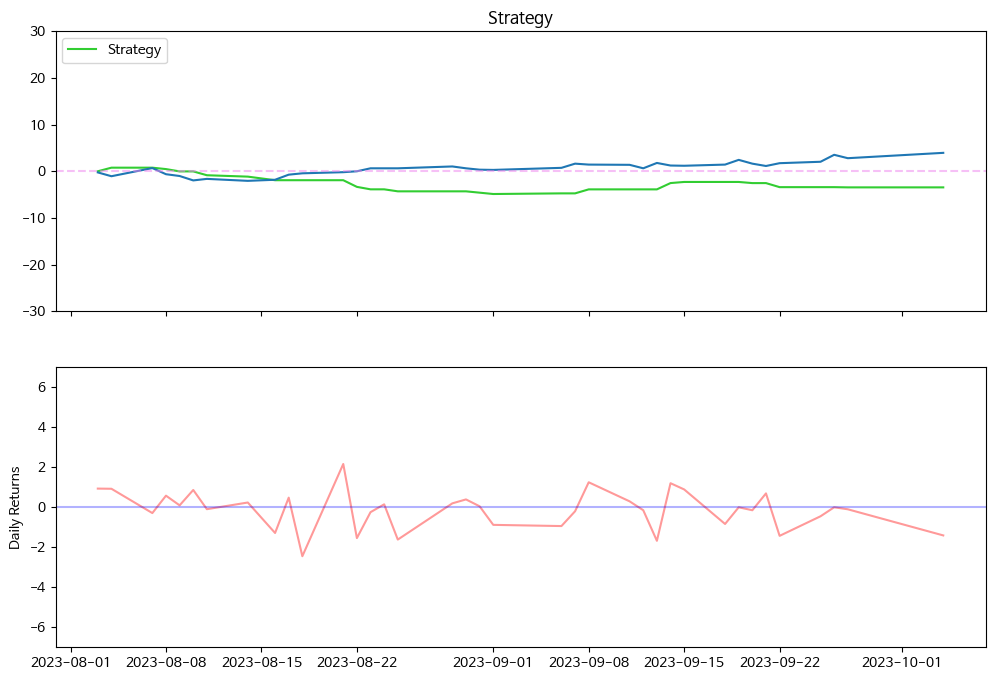

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.242954,0.934120
2023-08-04,10077.160253,0.771603,-1.060241,0.925475
2023-08-07,10077.160253,0.771603,0.686611,-0.289575
2023-08-08,10046.928773,0.469288,-0.629235,0.580833
2023-08-09,9997.448374,-0.025516,-1.012536,0.096246
2023-08-10,9997.448374,-0.025516,-1.957975,0.865385
2023-08-11,9915.038520,-0.849615,-1.629133,-0.095329
2023-08-14,9885.293405,-1.147066,-2.051527,0.238550
2023-08-16,9808.587104,-1.914129,-1.817312,-1.285102


In [220]:
#453630_2023, LGB 백테스팅 결과
y_pred_lgb_453630_2023 = lgb_model(X_train, y_train, X_test, y_test, cv = 3)
lgb_return_453630_2023 = backtest(etf_staple, y_pred_lgb_453630_2023)
lgb_accuracy_453630_2023 = accuracy_score(y_pred_lgb_453630_2023, y_test)

total_result = result_append(total_result ,'453630_2023','LGB', lgb_return_453630_2023, lgb_accuracy_453630_2023)

lgb_return_453630_2023

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.7027027027027027


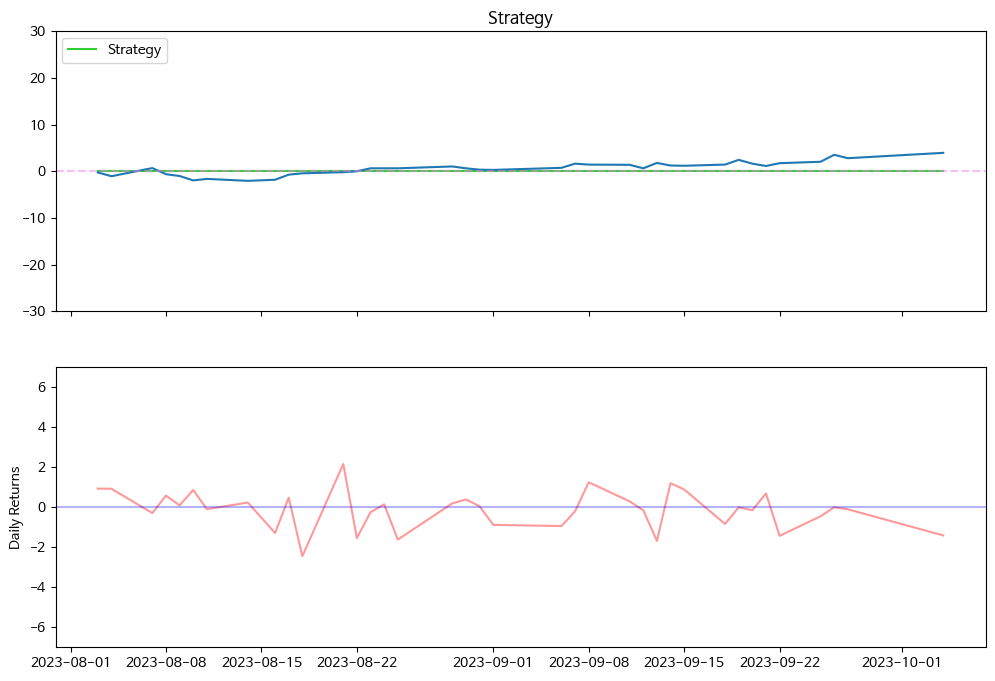

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000,0.0,-0.242954,0.934120
2023-08-04,10000,0.0,-1.060241,0.925475
2023-08-07,10000,0.0,0.686611,-0.289575
2023-08-08,10000,0.0,-0.629235,0.580833
2023-08-09,10000,0.0,-1.012536,0.096246
2023-08-10,10000,0.0,-1.957975,0.865385
2023-08-11,10000,0.0,-1.629133,-0.095329
2023-08-14,10000,0.0,-2.051527,0.238550
2023-08-16,10000,0.0,-1.817312,-1.285102


In [221]:
#453630_2023, SVM 백테스팅 결과
y_pred_svm_453630_2023 = svm_model(X_train, y_train, X_test, y_test, cv = 3)
svm_return_453630_2023 = backtest(etf_staple, y_pred_svm_453630_2023)
svm_accuracy_453630_2023 = accuracy_score(y_pred_svm_453630_2023, y_test)

total_result = result_append(total_result ,'453630_2023','SVM', svm_return_453630_2023, svm_accuracy_453630_2023)

svm_return_453630_2023

In [222]:
#453640 모델링
scaled_df(df_453640_2023, 453640)
df_453640_2023 = df_453640_2023.dropna(axis=0, how="any")
#X와 y를 정의, 종목코드_Label
X = df_453640_2023.drop(columns='453640_Label')
y = df_453640_2023['453640_Label']
#피처셀렉
selected_features = feature_select(X, y, cv = 5)

#선택된 피처로 X 정의
X = X[selected_features]

#학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'} 0.7567567567567568


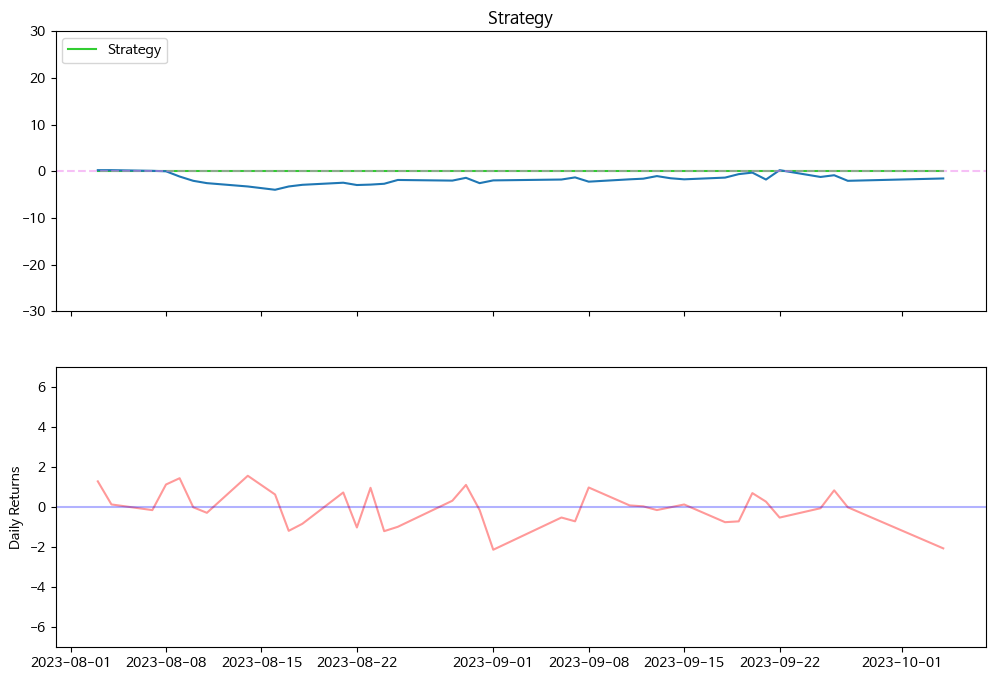

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000,0.0,0.237643,1.296830
2023-08-04,10000,0.0,0.237643,0.142248
2023-08-07,10000,0.0,0.094922,-0.142045
2023-08-08,10000,0.0,0.000000,1.137980
2023-08-09,10000,0.0,-1.125176,1.453352
2023-08-10,10000,0.0,-2.043660,0.000000
2023-08-11,10000,0.0,-2.541590,-0.277264
2023-08-14,10000,0.0,-3.256881,1.575533
2023-08-16,10000,0.0,-3.961749,0.638686


In [223]:
#453640_2023, logistic 백테스팅 결과
y_pred_lrc_453640_2023 = logistic_model(X_train, y_train, X_test, y_test, cv = 3)
lrc_return_453640_2023 = backtest(etf_health , y_pred_lrc_453640_2023)
lrc_accuracy_453640_2023 = accuracy_score(y_pred_lrc_453640_2023, y_test)

total_result = result_append(total_result ,'453640_2023','Logistic', lrc_return_453640_2023, lrc_accuracy_453640_2023)

lrc_return_453640_2023

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150} 0.7567567567567568


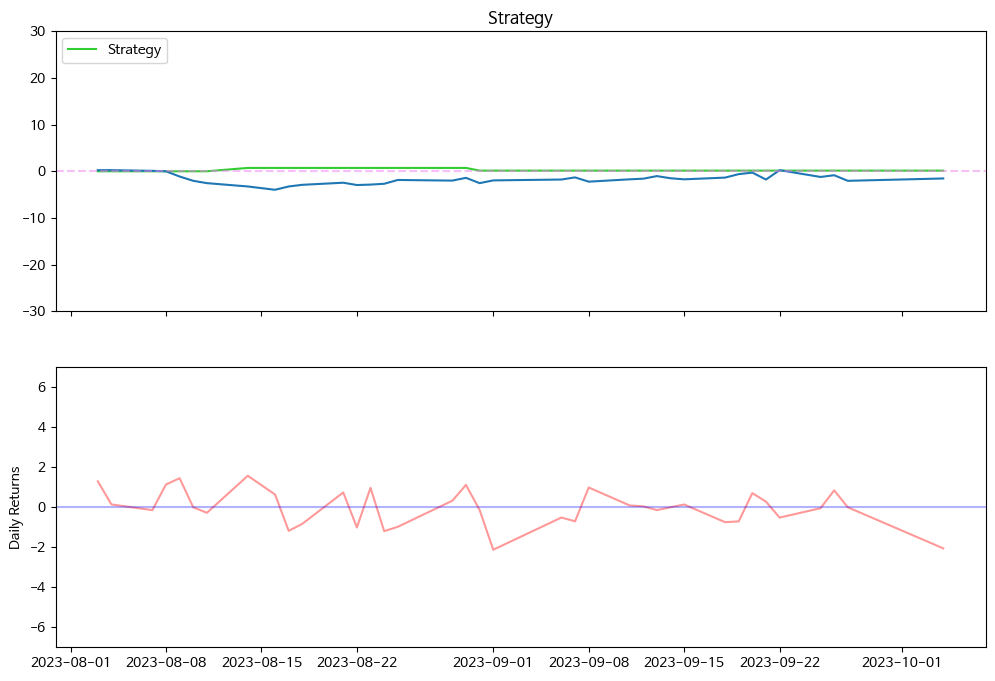

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,0.237643,1.296830
2023-08-04,10000.000000,0.000000,0.237643,0.142248
2023-08-07,10000.000000,0.000000,0.094922,-0.142045
2023-08-08,10000.000000,0.000000,0.000000,1.137980
2023-08-09,10000.000000,0.000000,-1.125176,1.453352
2023-08-10,10000.000000,0.000000,-2.043660,0.000000
2023-08-11,10000.000000,0.000000,-2.541590,-0.277264
2023-08-14,10071.946247,0.719462,-3.256881,1.575533
2023-08-16,10071.946247,0.719462,-3.961749,0.638686


In [224]:
#453640_2023, RF 백테스팅 결과
y_pred_rf_453640_2023 = rf_model(X_train, y_train, X_test, y_test, cv = 3)
rf_return_453640_2023 = backtest(etf_health , y_pred_rf_453640_2023)
rf_accuracy_453640_2023 = accuracy_score(y_pred_rf_453640_2023, y_test)

total_result = result_append(total_result ,'453640_2023','RF', rf_return_453640_2023, rf_accuracy_453640_2023)

rf_return_453640_2023

{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8} 0.7837837837837838


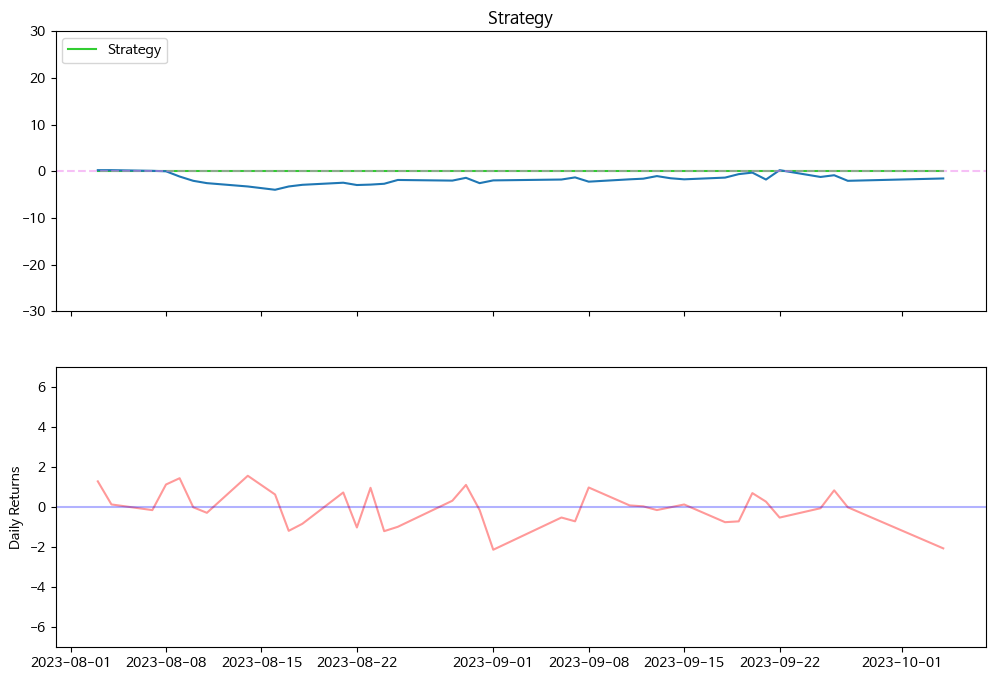

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000,0.0,0.237643,1.296830
2023-08-04,10000,0.0,0.237643,0.142248
2023-08-07,10000,0.0,0.094922,-0.142045
2023-08-08,10000,0.0,0.000000,1.137980
2023-08-09,10000,0.0,-1.125176,1.453352
2023-08-10,10000,0.0,-2.043660,0.000000
2023-08-11,10000,0.0,-2.541590,-0.277264
2023-08-14,10000,0.0,-3.256881,1.575533
2023-08-16,10000,0.0,-3.961749,0.638686


In [225]:
#453640_2023, XGB 백테스팅 결과
y_pred_xgb_453640_2023 = xgb_model(X_train, y_train, X_test, y_test, cv = 3)
xgb_return_453640_2023 = backtest(etf_health, y_pred_xgb_453640_2023)
xgb_accuracy_453640_2023 = accuracy_score(y_pred_xgb_453640_2023, y_test)

total_result = result_append(total_result ,'453640_2023','XGB', xgb_return_453640_2023, xgb_accuracy_453640_2023)

xgb_return_453640_2023

[LightGBM] [Info] Number of positive: 31, number of negative: 53
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1991
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369048 -> initscore=-0.536305
[LightGBM] [Info] Start training from score -0.536305
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

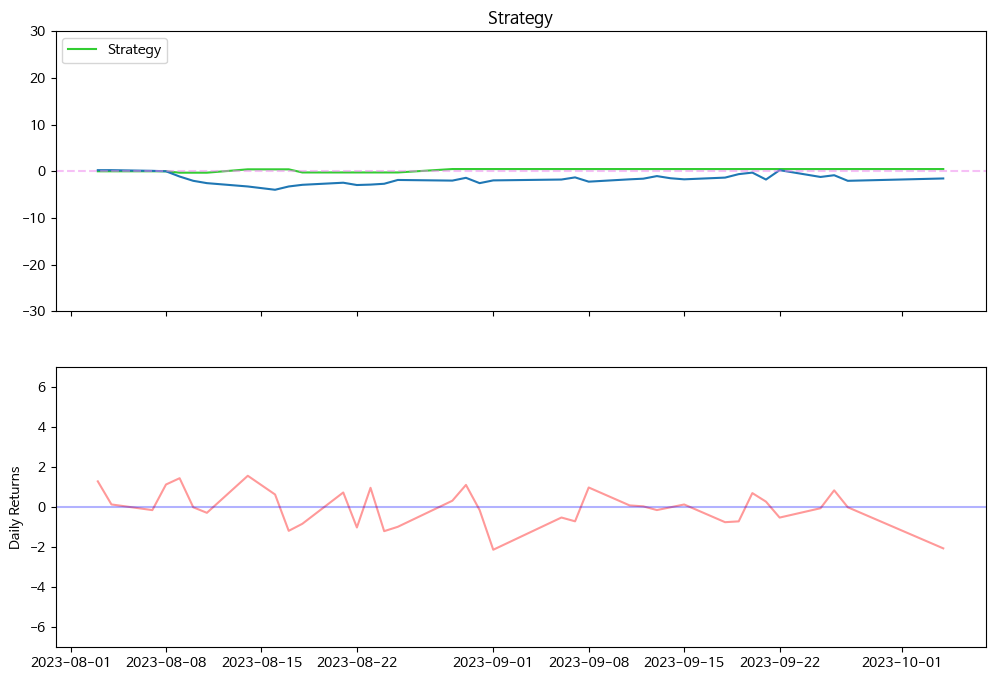

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,0.237643,1.296830
2023-08-04,10000.000000,0.000000,0.237643,0.142248
2023-08-07,10000.000000,0.000000,0.094922,-0.142045
2023-08-08,10000.000000,0.000000,0.000000,1.137980
2023-08-09,9970.000000,-0.300000,-1.125176,1.453352
2023-08-10,9970.000000,-0.300000,-2.043660,0.000000
2023-08-11,9970.000000,-0.300000,-2.541590,-0.277264
2023-08-14,10041.730408,0.417304,-3.256881,1.575533
2023-08-16,10041.730408,0.417304,-3.961749,0.638686


In [226]:
#453640_2023, LGB 백테스팅 결과
y_pred_lgb_453640_2023 = lgb_model(X_train, y_train, X_test, y_test, cv = 3)
lgb_return_453640_2023 = backtest(etf_health, y_pred_lgb_453640_2023)
lgb_accuracy_453640_2023 = accuracy_score(y_pred_lgb_453640_2023, y_test)

total_result = result_append(total_result ,'453640_2023','LGB', lgb_return_453640_2023, lgb_accuracy_453640_2023)

lgb_return_453640_2023

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.7567567567567568


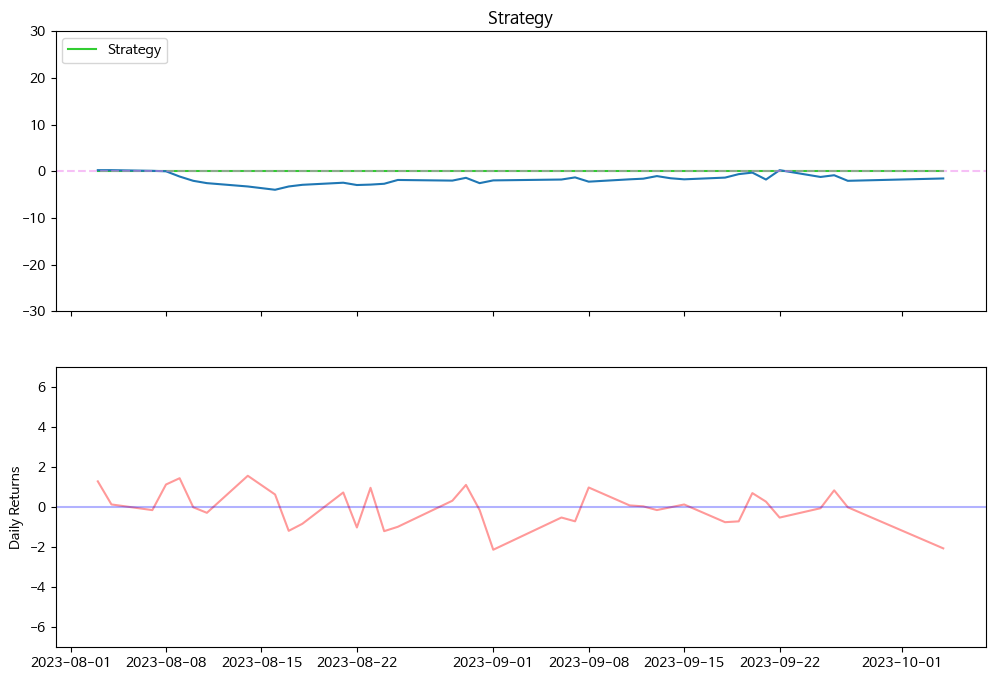

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000,0.0,0.237643,1.296830
2023-08-04,10000,0.0,0.237643,0.142248
2023-08-07,10000,0.0,0.094922,-0.142045
2023-08-08,10000,0.0,0.000000,1.137980
2023-08-09,10000,0.0,-1.125176,1.453352
2023-08-10,10000,0.0,-2.043660,0.000000
2023-08-11,10000,0.0,-2.541590,-0.277264
2023-08-14,10000,0.0,-3.256881,1.575533
2023-08-16,10000,0.0,-3.961749,0.638686


In [227]:
#453640_2023, SVM 백테스팅 결과
y_pred_svm_453640_2023 = svm_model(X_train, y_train, X_test, y_test, cv = 3)
svm_return_453640_2023= backtest(etf_health, y_pred_svm_453640_2023)
svm_accuracy_453640_2023 = accuracy_score(y_pred_svm_453640_2023, y_test)

total_result = result_append(total_result ,'453640_2023','SVM', svm_return_453640_2023, svm_accuracy_453640_2023)

svm_return_453640_2023

In [229]:
#453650 모델링
scaled_df(df_453650_2023, 453650)
df_453650_2023 = df_453650_2023.dropna(axis=0, how="any")
#X와 y를 정의, 종목코드_Label
X = df_453650_2023.drop(columns='453650_Label')
y = df_453650_2023['453650_Label']
#피처셀렉
selected_features = feature_select(X, y, cv = 5)

#선택된 피처로 X 정의
X = X[selected_features]

#학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'} 0.8378378378378378


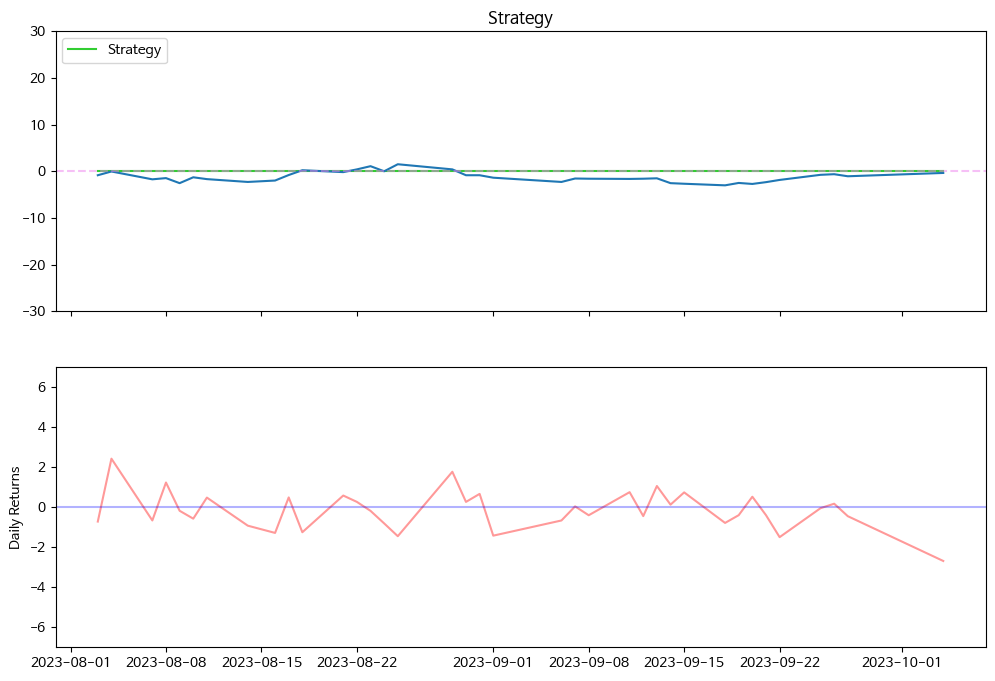

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000,0.0,-0.847836,-0.714924
2023-08-04,10000,0.0,-0.044984,2.430243
2023-08-07,10000,0.0,-1.724900,-0.659051
2023-08-08,10000,0.0,-1.463415,1.238390
2023-08-09,10000,0.0,-2.543860,-0.174749
2023-08-10,10000,0.0,-1.288316,-0.568928
2023-08-11,10000,0.0,-1.681416,0.484155
2023-08-14,10000,0.0,-2.286719,-0.919842
2023-08-16,10000,0.0,-1.985002,-1.282051


In [230]:
#453650_2023, logistic 백테스팅 결과
y_pred_lrc_453650_2023 = logistic_model(X_train, y_train, X_test, y_test, cv=3)
lrc_return_453650_2023 = backtest(etf_fin , y_pred_lrc_453650_2023)
lrc_accuracy_453650_2023 = accuracy_score(y_pred_lrc_453650_2023, y_test)

total_result = result_append(total_result ,'453650_2023','Logistic', lrc_return_453650_2023, lrc_accuracy_453650_2023)

lrc_return_453650_2023

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50} 0.7297297297297297


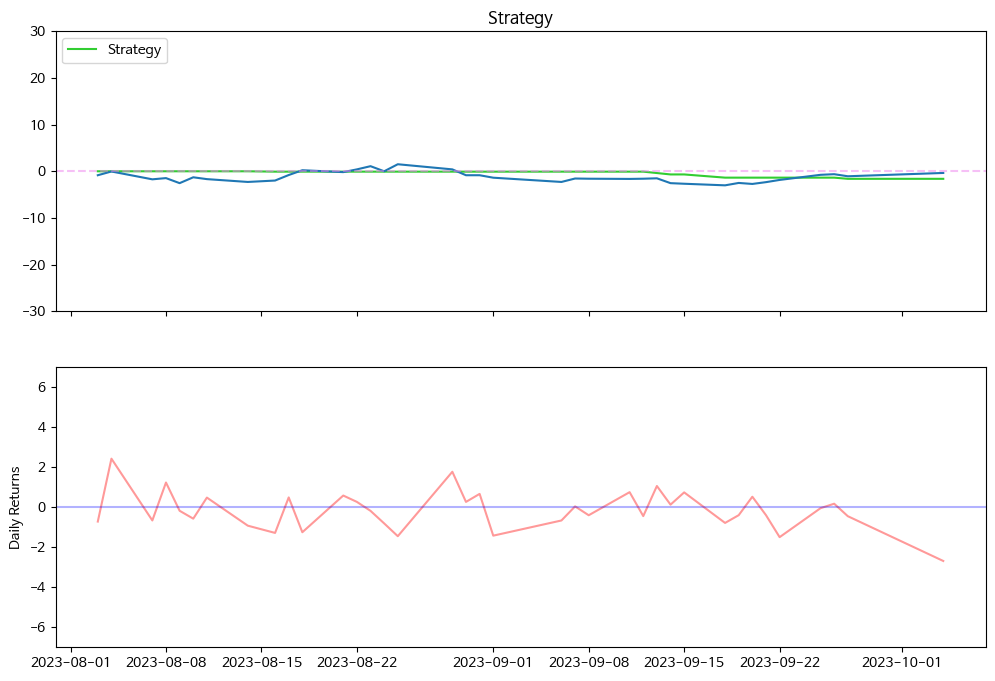

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.847836,-0.714924
2023-08-04,10000.000000,0.000000,-0.044984,2.430243
2023-08-07,10000.000000,0.000000,-1.724900,-0.659051
2023-08-08,10000.000000,0.000000,-1.463415,1.238390
2023-08-09,10000.000000,0.000000,-2.543860,-0.174749
2023-08-10,10000.000000,0.000000,-1.288316,-0.568928
2023-08-11,10000.000000,0.000000,-1.681416,0.484155
2023-08-14,10000.000000,0.000000,-2.286719,-0.919842
2023-08-16,9992.104332,-0.078957,-1.985002,-1.282051


In [231]:
#453650_2023, RF 백테스팅 결과
y_pred_rf_453650_2023 = rf_model(X_train, y_train, X_test, y_test, cv=3)
rf_return_453650_2023 = backtest(etf_fin , y_pred_rf_453650_2023)
rf_accuracy_453650_2023 = accuracy_score(y_pred_rf_453650_2023, y_test)

total_result = result_append(total_result ,'453650_2023','RF', rf_return_453650_2023, rf_accuracy_453650_2023)
rf_return_453650_2023

{'colsample_bytree': 1, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1} 0.6756756756756757


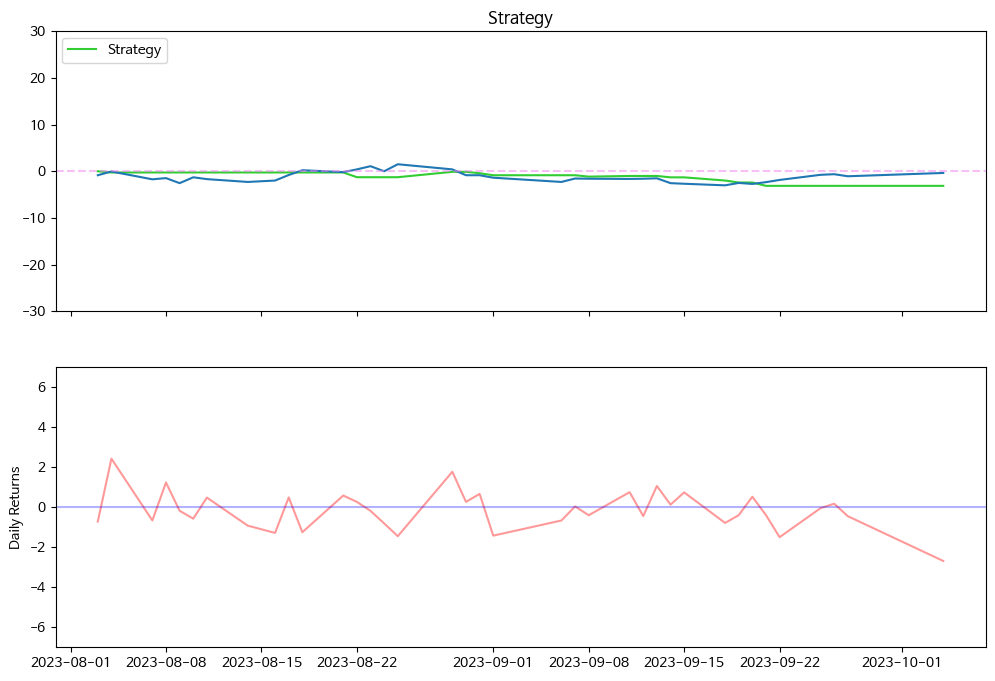

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.847836,-0.714924
2023-08-04,9974.500450,-0.254995,-0.044984,2.430243
2023-08-07,9974.500450,-0.254995,-1.724900,-0.659051
2023-08-08,9974.500450,-0.254995,-1.463415,1.238390
2023-08-09,9974.500450,-0.254995,-2.543860,-0.174749
2023-08-10,9974.500450,-0.254995,-1.288316,-0.568928
2023-08-11,9974.500450,-0.254995,-1.681416,0.484155
2023-08-14,9974.500450,-0.254995,-2.286719,-0.919842
2023-08-16,9974.500450,-0.254995,-1.985002,-1.282051


In [232]:
#453630_2023, XGB 백테스팅 결과
y_pred_xgb_453650_2023 = xgb_model(X_train, y_train, X_test, y_test,cv=3)
xgb_return_453650_2023 = backtest(etf_fin , y_pred_xgb_453650_2023)
xgb_accuracy_453650_2023 = accuracy_score(y_pred_xgb_453650_2023, y_test)

total_result = result_append(total_result ,'453650_2023','XGB', xgb_return_453650_2023, xgb_accuracy_453650_2023)
xgb_return_453650_2023

[LightGBM] [Info] Number of positive: 32, number of negative: 52
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2478
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 86
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.380952 -> initscore=-0.485508
[LightGBM] [Info] Start training from score -0.485508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

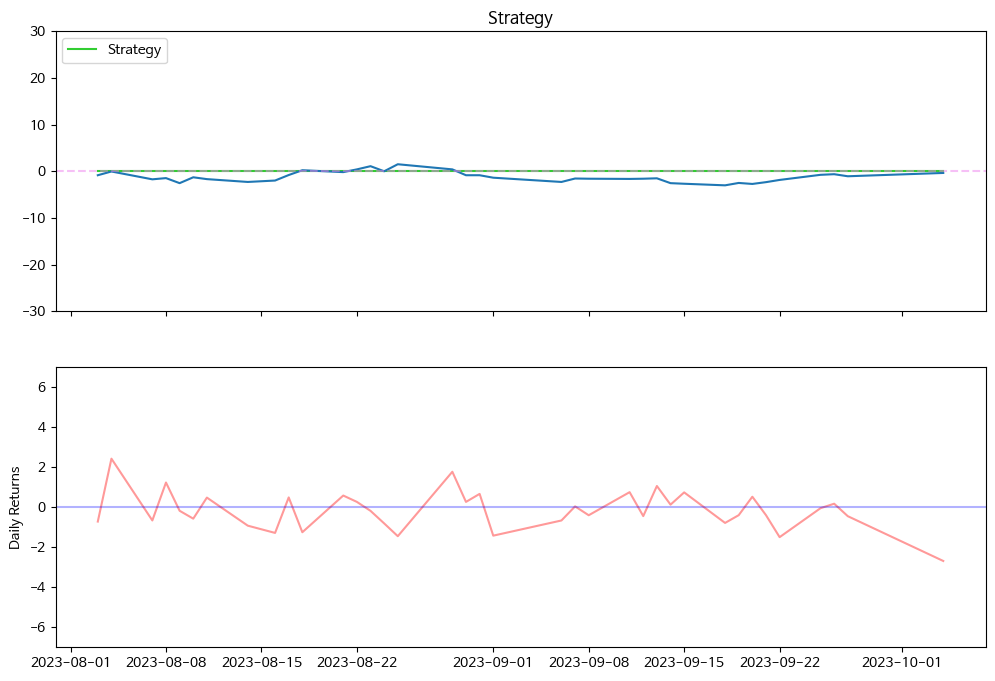

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000,0.0,-0.847836,-0.714924
2023-08-04,10000,0.0,-0.044984,2.430243
2023-08-07,10000,0.0,-1.724900,-0.659051
2023-08-08,10000,0.0,-1.463415,1.238390
2023-08-09,10000,0.0,-2.543860,-0.174749
2023-08-10,10000,0.0,-1.288316,-0.568928
2023-08-11,10000,0.0,-1.681416,0.484155
2023-08-14,10000,0.0,-2.286719,-0.919842
2023-08-16,10000,0.0,-1.985002,-1.282051


In [233]:
#453650_2023, LGB 백테스팅 결과
y_pred_lgb_453650_2023 = lgb_model(X_train, y_train, X_test, y_test, cv=3)
lgb_return_453650_2023 = backtest(etf_fin, y_pred_lgb_453650_2023)
lgb_accuracy_453650_2023 = accuracy_score(y_pred_lgb_453650_2023, y_test)

total_result = result_append(total_result ,'453650_2023','LGB', lgb_return_453650_2023, lgb_accuracy_453650_2023)

lgb_return_453650_2023

{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'} 0.8378378378378378


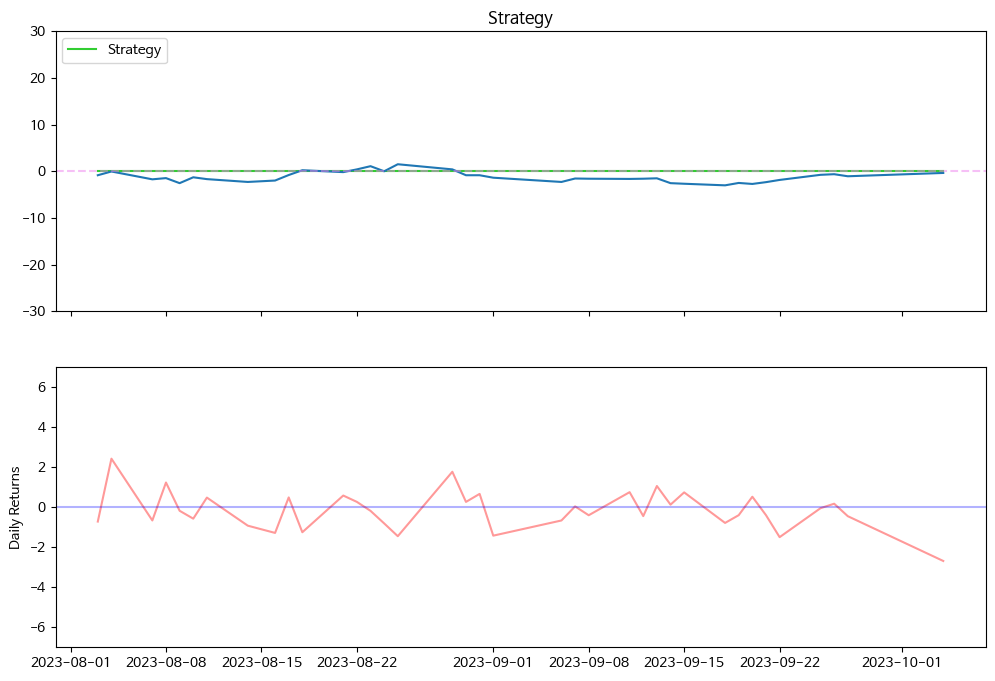

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000,0.0,-0.847836,-0.714924
2023-08-04,10000,0.0,-0.044984,2.430243
2023-08-07,10000,0.0,-1.724900,-0.659051
2023-08-08,10000,0.0,-1.463415,1.238390
2023-08-09,10000,0.0,-2.543860,-0.174749
2023-08-10,10000,0.0,-1.288316,-0.568928
2023-08-11,10000,0.0,-1.681416,0.484155
2023-08-14,10000,0.0,-2.286719,-0.919842
2023-08-16,10000,0.0,-1.985002,-1.282051


In [234]:
#453650_2023, SVM 백테스팅 결과
y_pred_svm_453650_2023 = svm_model(X_train, y_train, X_test, y_test, cv=3)
svm_return_453650_2023= backtest(etf_fin, y_pred_svm_453650_2023)
svm_accuracy_453650_2023 = accuracy_score(y_pred_svm_453650_2023, y_test)

total_result = result_append(total_result ,'453650_2023','SVM', svm_return_453650_2023, svm_accuracy_453650_2023)

svm_return_453650_2023

In [235]:
#453660 모델링
scaled_df(df_453660_2023, 453660)
df_453660_2023 = df_453660_2023.dropna(axis=0, how="any")
#X와 y를 정의, 종목코드_Label
X = df_453660_2023.drop(columns='453660_Label')
y = df_453660_2023['453660_Label']
#피처셀렉
selected_features = feature_select(X, y, cv = 5)

#선택된 피처로 X 정의
X = X[selected_features]

#학습과 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=False)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} 0.6756756756756757


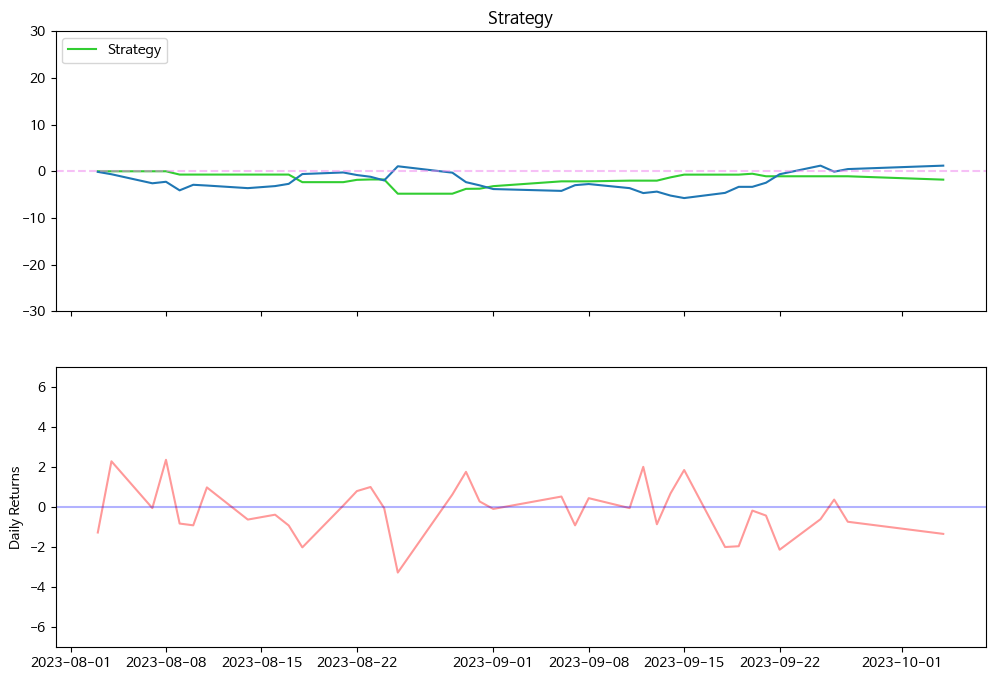

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.127605,-1.261564
2023-08-04,10000.000000,0.000000,-0.634786,2.299830
2023-08-07,10000.000000,0.000000,-2.572614,-0.041632
2023-08-08,10000.000000,0.000000,-2.248127,2.374011
2023-08-09,9929.316517,-0.706835,-4.084967,-0.813670
2023-08-10,9929.316517,-0.706835,-2.894955,-0.902379
2023-08-11,9929.316517,-0.706835,-3.055326,0.993377
2023-08-14,9929.316517,-0.706835,-3.612479,-0.614754
2023-08-16,9929.316517,-0.706835,-3.175258,-0.371134


In [236]:
#453660_2023, logistic 백테스팅 결과
y_pred_lrc_453660_2023 = logistic_model(X_train, y_train, X_test, y_test, cv=3)
lrc_return_453660_2023 = backtest(etf_cond , y_pred_lrc_453660_2023)
lrc_accuracy_453660_2023 = accuracy_score(y_pred_lrc_453660_2023, y_test)

total_result = result_append(total_result ,'453660_2023','Logistic', lrc_return_453660_2023, lrc_accuracy_453660_2023)

lrc_return_453660_2023

{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150} 0.4864864864864865


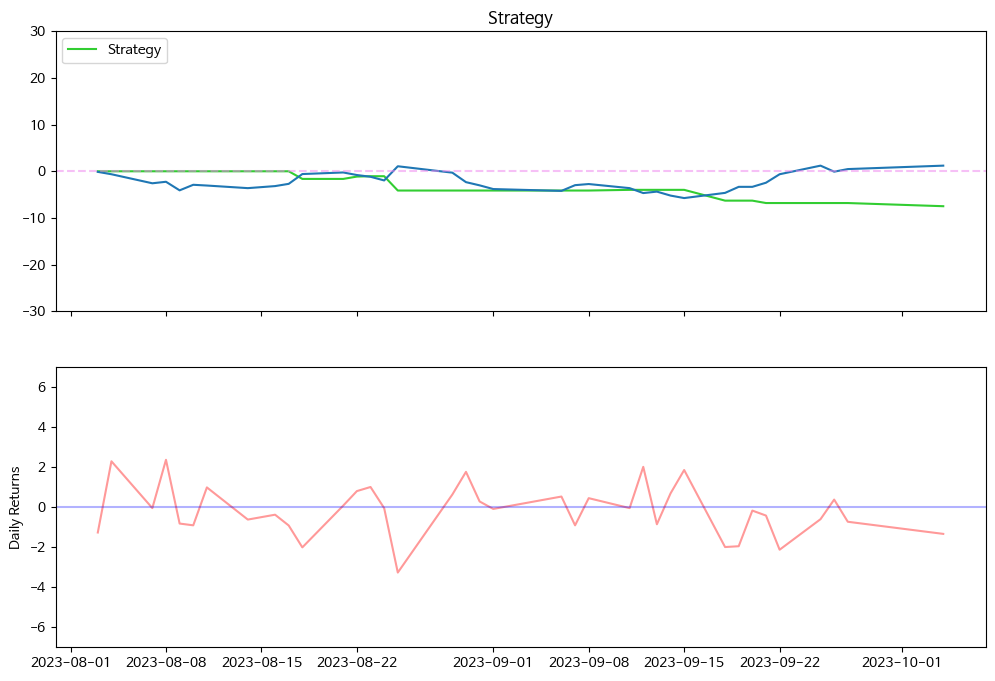

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.127605,-1.261564
2023-08-04,10000.000000,0.000000,-0.634786,2.299830
2023-08-07,10000.000000,0.000000,-2.572614,-0.041632
2023-08-08,10000.000000,0.000000,-2.248127,2.374011
2023-08-09,10000.000000,0.000000,-4.084967,-0.813670
2023-08-10,10000.000000,0.000000,-2.894955,-0.902379
2023-08-11,10000.000000,0.000000,-3.055326,0.993377
2023-08-14,10000.000000,0.000000,-3.612479,-0.614754
2023-08-16,10000.000000,0.000000,-3.175258,-0.371134


In [237]:
#453660_2023, RF 백테스팅 결과
y_pred_rf_453660_2023 = rf_model(X_train, y_train, X_test, y_test, cv=3)
rf_return_453660_2023 = backtest(etf_cond , y_pred_rf_453660_2023)
rf_accuracy_453660_2023 = accuracy_score(y_pred_rf_453660_2023, y_test)

total_result = result_append(total_result ,'453660_2023','RF', rf_return_453660_2023, rf_accuracy_453660_2023)

rf_return_453660_2023

{'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8} 0.5945945945945946


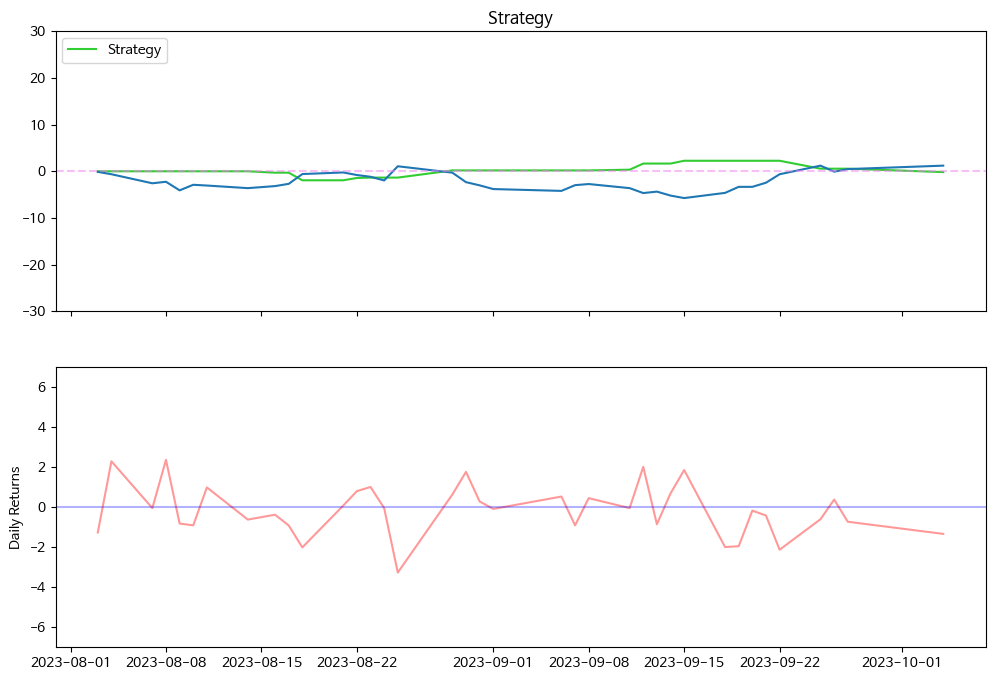

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.127605,-1.261564
2023-08-04,10000.000000,0.000000,-0.634786,2.299830
2023-08-07,10000.000000,0.000000,-2.572614,-0.041632
2023-08-08,10000.000000,0.000000,-2.248127,2.374011
2023-08-09,10000.000000,0.000000,-4.084967,-0.813670
2023-08-10,10000.000000,0.000000,-2.894955,-0.902379
2023-08-11,10000.000000,0.000000,-3.055326,0.993377
2023-08-14,10000.000000,0.000000,-3.612479,-0.614754
2023-08-16,9970.000000,-0.300000,-3.175258,-0.371134


In [238]:
#453660_2023, XGB 백테스팅 결과
y_pred_xgb_453660_2023 = xgb_model(X_train, y_train, X_test, y_test, cv=3)
xgb_return_453660_2023 = backtest(etf_cond , y_pred_xgb_453660_2023)
xgb_accuracy_453660_2023 = accuracy_score(y_pred_xgb_453660_2023, y_test)

total_result = result_append(total_result ,'453660_2023','XGB', xgb_return_453660_2023, xgb_accuracy_453660_2023)

xgb_return_453660_2023

[LightGBM] [Info] Number of positive: 42, number of negative: 42
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1654
[LightGBM] [Info] Number of data points in the train set: 84, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

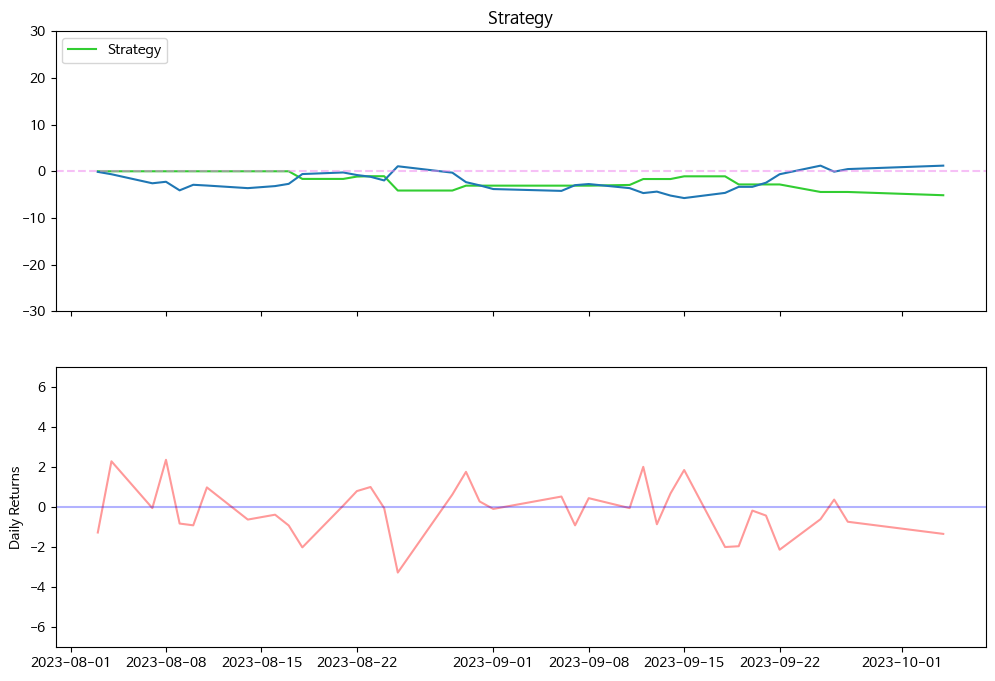

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.127605,-1.261564
2023-08-04,10000.000000,0.000000,-0.634786,2.299830
2023-08-07,10000.000000,0.000000,-2.572614,-0.041632
2023-08-08,10000.000000,0.000000,-2.248127,2.374011
2023-08-09,10000.000000,0.000000,-4.084967,-0.813670
2023-08-10,10000.000000,0.000000,-2.894955,-0.902379
2023-08-11,10000.000000,0.000000,-3.055326,0.993377
2023-08-14,10000.000000,0.000000,-3.612479,-0.614754
2023-08-16,10000.000000,0.000000,-3.175258,-0.371134


In [239]:
#453660_2023, LGB 백테스팅 결과
y_pred_lgb_453660_2023 = lgb_model(X_train, y_train, X_test, y_test, cv=3)
lgb_return_453660_2023 = backtest(etf_cond, y_pred_lgb_453660_2023)
lgb_accuracy_453660_2023 = accuracy_score(y_pred_lgb_453660_2023, y_test)

total_result = result_append(total_result ,'453660_2023','LGB', lgb_return_453660_2023, lgb_accuracy_453660_2023)

lgb_return_453660_2023

{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'} 0.6486486486486487


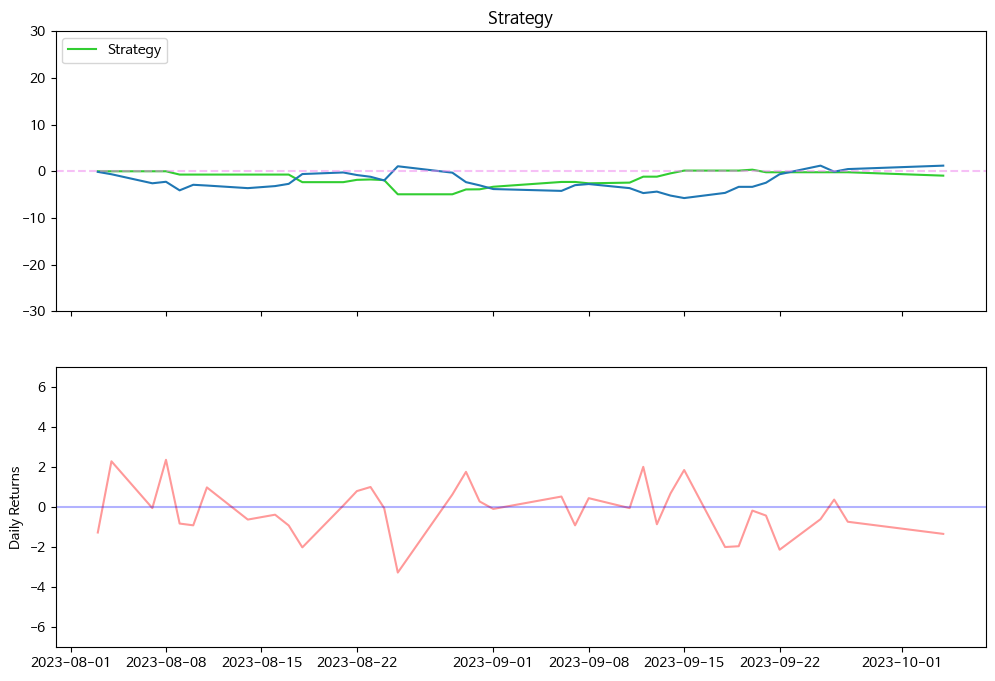

,Balance,Return Rate %,Holding Return Rate %,등락률
날짜,,,,
2023-08-03,10000.000000,0.000000,-0.127605,-1.261564
2023-08-04,10000.000000,0.000000,-0.634786,2.299830
2023-08-07,10000.000000,0.000000,-2.572614,-0.041632
2023-08-08,10000.000000,0.000000,-2.248127,2.374011
2023-08-09,9929.316517,-0.706835,-4.084967,-0.813670
2023-08-10,9929.316517,-0.706835,-2.894955,-0.902379
2023-08-11,9929.316517,-0.706835,-3.055326,0.993377
2023-08-14,9929.316517,-0.706835,-3.612479,-0.614754
2023-08-16,9929.316517,-0.706835,-3.175258,-0.371134


In [240]:
#453660_2023, SVM 백테스팅 결과
y_pred_svm_453660_2023 = svm_model(X_train, y_train, X_test, y_test, cv=3)
svm_return_453660_2023= backtest(etf_cond, y_pred_svm_453660_2023)
svm_accuracy_453660_2023 = accuracy_score(y_pred_svm_453660_2023, y_test)

total_result = result_append(total_result ,'453660_2023','SVM', svm_return_453660_2023, svm_accuracy_453660_2023)

svm_return_453660_2023

In [256]:
total_result

,Model,Return Rate %,Holding Return Rate %,accuracy
200030_2018,Logistic,-2.244824,-10.222222,0.613181
200030_2018,RF,-0.152361,-10.222222,0.601719
200030_2018,XGB,-4.786658,-10.222222,0.607450
200030_2018,LGB,-7.253884,-10.222222,0.598854
200030_2018,SVM,0.000000,-10.222222,0.621777
200030_2014,Logistic,-0.446466,-12.323093,0.672932
200030_2014,RF,-0.446466,-12.323093,0.672932
200030_2014,XGB,0.000000,-12.323093,0.676692
200030_2014,LGB,0.000000,-12.323093,0.676692
200030_2014,SVM,0.417118,-12.323093,0.676692


In [257]:
total_result.groupby('Model').mean()

,Return Rate %,Holding Return Rate %,accuracy
Model,,,
LGB,-0.399876,-7.098271,0.637619
Logistic,-0.951636,-7.098271,0.659723
RF,0.222378,-7.098271,0.618199
SVM,0.248315,-7.098271,0.678876
XGB,-1.421467,-7.098271,0.629071


### 결과 
- 섹터별 상장 기간이 상이해, 벡테스팅 기간을 다르게 적용했다. 산업재(2017.05~2018.06, 2022.03~2023.10), 에너지(2017.07~2018.06, 2022.03~2023.10), 헬스케어, 금융, 필수소비재, 경기소비재(2023.08~2023.10, 4개 섹터 공통)로 벡테스팅 기간을 설정하였다.
> 산업재(200030) 2022.03~2023.10의 벤치마크 수익률: -10.22%
- 아보카도팀의 모델 평균 수익률 :  -2.88%

> 산업재(200030) 2017.05~2018.06의 벤치마크 수익률: -12.32%
- 아보카도팀의 모델 평균 수익률 :  -0.48%

> 에너지섹터(218420) 2022.03~2023.10의 벤치마크: -27.37%
- 아보카도팀의 모델 평균 수익률 :  5.79%

> 에너지섹터(218420) 2017.07~2018.06의 벤치마크: -10.13%
- 아보카도팀의 모델 평균 수익률 :  0.01%

> 필수소비재(453630) 2023.08~2023.10의 벤치마크: 3.95%
- 아보카도팀의 모델 평균 수익률 :  -2.7%
    
> 헬스케어(453640) 2023.08~2023.10의 벤치마크: -1.54%
- 아보카도팀의 모델 평균 수익률 :  0.12%
    
> 금융(453650) 2023.08~2023.10의 벤치마크: -0.36%
- 아보카도팀의 모델 평균 수익률 :  -0.94%
    
> 경기소비재(453660) 2023.08~2023.10의 벤치마크: 1.21%
- 아보카도팀의 모델 평균 수익률 :  -3.10%

### 결론

- 수익률이 가장 잘 나온 모델의 경우, 에너지섹터(218420) 2022.03~2023.10 백테스팅 기간에서 Random Forest 모델을 적용하여, 15.67%의 수익률을 더을 수 있었다.

- 상장일이 길어 긴 시계열로 볼 수 있는 산업재와 에너지 섹터의 경우 평균수익률 뿐 아니라, 어떠한 모델을 적용하더라도 벤치마크대비 안정적으로 overperform함을 보였다.

- 최근 상장한 필수소비재, 헬스케어, 금융, 경기소비재 섹터의 경우 다소 단기적인 시계열로 보아 한계점이 존재한다. 헬스케어를 제외한 나머지 섹터에서 평균수익률은 벤치마크대비 underperform하였다.

- 산업재와 에너지 섹터의 경우, 해당 ETF가 추종하는 미국 ETF는 모두 베타가 1이상으로 시장의 영향을 많이 받는다. 이러한 섹터에 투자했을 때의 전략이 더 효과적이었다. 
    
- 경기 방어주인 필수 소비재와 헬스케어의 경우, 해당 ETF가 추종하는 미국 ETF는 모두 베타가 1이하로 시장의 영향을 적게 받는다. 이러한 섹터에 투자했을 때의 전략은 덜 효과적이었다.

- 주식 장기 보유에 대한 리스크를 해소함과 함께, 상대적으로 시장의 영향을 크게 받는 섹터 투자에 유리한 전략이라고 판단된다.

